In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/Users/ankitmehra/Downloads/datasets/data.csv')
data

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
# renaming columns

In [5]:
data.rename(columns = {'Unnamed: 0':'Duplicate'}, inplace = True)

In [6]:
# dropping duplicate columns

In [7]:
data.drop(['Photo','Flag','Club Logo','Duplicate'],axis=1,inplace=True)
data.shape

(18207, 85)

In [8]:
# data manipulation - columns conversion

In [9]:
data[['Value','Wage','Release Clause']]

Value   Wage Release Clause
0      €110.5M  €565K        €226.5M
1         €77M  €405K        €127.1M
2      €118.5M  €290K        €228.1M
3         €72M  €260K        €138.6M
4        €102M  €355K        €196.4M
...        ...    ...            ...
18202     €60K    €1K          €143K
18203     €60K    €1K          €113K
18204     €60K    €1K          €165K
18205     €60K    €1K          €143K
18206     €60K    €1K          €165K

[18207 rows x 3 columns]

In [10]:
def Value_float(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)
data['Value'] = data['Value'].apply(Value_float)
data['Wage'] = data['Wage'].apply(Value_float)
data['Release Clause'] = data['Release Clause'].apply(Value_float)

In [11]:
data[['Value','Wage','Release Clause']]

Value      Wage  Release Clause
0      110500000.0  565000.0     226500000.0
1       77000000.0  405000.0     127100000.0
2      118500000.0  290000.0     228100000.0
3       72000000.0  260000.0     138600000.0
4      102000000.0  355000.0     196400000.0
...            ...       ...             ...
18202      60000.0    1000.0        143000.0
18203      60000.0    1000.0        113000.0
18204      60000.0    1000.0        165000.0
18205      60000.0    1000.0        143000.0
18206      60000.0    1000.0        165000.0

[18207 rows x 3 columns]

In [12]:
# target column - release clause class
def income(x):
    if x<1000000:
        return 'low_income_class'
    elif x>=1000000:
        return 'high_income_class'   
data["Release_Clause_Class"] = data["Release Clause"].apply(income)
data

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club        Value      Wage  Special  ... Marking  \
0             FC Barcelona  110500000.0  565000.0     2202  ...    33.0   
1                 Juventus   77000000.0  405000.0     2228  ...    28.0   
2      Paris Saint-Germain  118500000.0  290000.0     2143  ...    27.0   
3        Manchester United   72000000.0  260000.0     1471  ...    15.0   
4          Manchester City  102000000.0  355000.0     2281  ...    68.0   
...                    ...          ...       ...      ...  ...     ...   
18202      Crewe Alexandra      60000.0    1000.0     1307  ...    40.0   
18203       Trelleborgs FF      60000.0    1000.0     1098  ...    22.0   
18204     Cambridge United      60000.0    1000.0     1189  ...    32.0   
18205      Tranmere Rovers      60000.0    1000.0     1228  ...    20.0   
18206      Tranmere Rovers      60000.0    1000.0     1321  ...    40.0   

       StandingTackle  SlidingTackle  GKDiving GKHandling GKKicking  \
0                28.0           26.0       6.0       11.0      15.0   
1                31.0           23.0       7.0       11.0      15.0   
2                24.0           33.0       9.0        9.0      15.0   
3                21.0           13.0      90.0       85.0      87.0   
4                58.0           51.0      15.0       13.0       5.0   
...               ...            ...       ...        ...       ...   
18202            48.0           47.0      10.0       13.0       7.0   
18203            15.0           19.0      10.0        9.0       9.0   
18204            13.0           11.0       6.0        5.0      10.0   
18205            25.0           27.0      14.0        6.0      14.0   
18206            43.0           50.0      10.0       15.0       9.0   

      GKPositioning GKReflexes  Release Clause Release_Clause_Class  
0              14.0        8.0     226500000.0    high_income_class  
1              14.0       11.0     127100000.0    high_income_class  
2              15.0       11.0     228100000.0    high_income_class  
3              88.0       94.0     138600000.0    high_income_class  
4              10.0       13.0     196400000.0    high_income_class  
...             ...        ...             ...                  ...  
18202           8.0        9.0        143000.0     low_income_class  
18203           5.0       12.0        113000.0     low_income_class  
18204           6.0       13.0        165000.0     low_income_class  
18205           8.0        9.0        143000.0     low_income_class  
18206          12.0        9.0        165000.0     low_income_class  

[18207 rows x 86 columns]

In [13]:
data["Release Clause"].min()

13000.0

In [14]:
data["Release Clause"].max()

228100000.0

In [15]:
data["Release_Clause_Class"].value_counts()

high_income_class    9150
low_income_class     7493
Name: Release_Clause_Class, dtype: int64

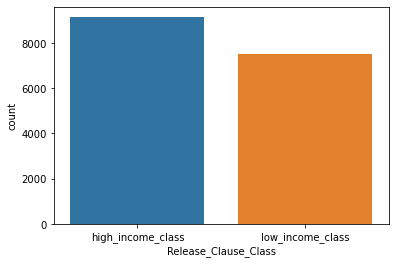

In [16]:
sns.countplot(x="Release_Clause_Class",data=data)
plt.show()

In [17]:
data["Release_Clause_Class"] = data["Release_Clause_Class"].map({"low_income_class":0,
                                                                 "high_income_class":1})

In [18]:
data.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  ... Marking  \
0         FC Barcelona  110500000.0  565000.0     2202  ...    33.0   
1             Juventus   77000000.0  405000.0     2228  ...    28.0   
2  Paris Saint-Germain  118500000.0  290000.0     2143  ...    27.0   
3    Manchester United   72000000.0  260000.0     1471  ...    15.0   
4      Manchester City  102000000.0  355000.0     2281  ...    68.0   

   StandingTackle  SlidingTackle  GKDiving GKHandling GKKicking GKPositioning  \
0            28.0           26.0       6.0       11.0      15.0          14.0   
1            31.0           23.0       7.0       11.0      15.0          14.0   
2            24.0           33.0       9.0        9.0      15.0          15.0   
3            21.0           13.0      90.0       85.0      87.0          88.0   
4            58.0           51.0      15.0       13.0       5.0          10.0   

  GKReflexes  Release Clause Release_Clause_Class  
0        8.0     226500000.0                  1.0  
1       11.0     127100000.0                  1.0  
2       11.0     228100000.0                  1.0  
3       94.0     138600000.0                  1.0  
4       13.0     196400000.0                  1.0  

[5 rows x 86 columns]

In [19]:
# converting columns

In [20]:
data['Joined'].isna().sum()

1553

In [21]:
data['Joined']=data['Joined'].fillna('0')

In [22]:
data['Joined'].isna().sum()

0

In [23]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [24]:
def str4(x):
    if isinstance(x,str):
        return int(x[-4:])
data['Joined'] = data['Joined'].apply(str4)

In [25]:
data['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [26]:
data['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [27]:
data['Contract Valid Until']= pd.to_datetime(data['Contract Valid Until'])

In [28]:
data['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [29]:
data['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [30]:
def feet(x):
    l=[]
    if isinstance(x,str):
        l = x.split("'")
        i = int(l[0])
        j = int(l[1])
        f = ((i*12)+j)/12
        return f
data['Height'] = data['Height'].apply(feet)

In [31]:
data['Height'].head()

0    5.583333
1    6.166667
2    5.750000
3    6.333333
4    5.916667
Name: Height, dtype: float64

In [32]:
data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [33]:
def llbs(x):
    l=[]
    if isinstance(x,str):
        l = x.split("lbs")
        i = l[0]
        return float(i)
data['Weight'] = data['Weight'].apply(llbs)

In [34]:
data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [35]:
# filling null values with mean

In [36]:
data['Weight'].fillna(data['Weight'].mean(), inplace = True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Height'].fillna(data['Height'].mean(), inplace = True)
data['Joined'].fillna(data['Joined'].mean(), inplace = True)

In [37]:
# total number of unique positions and tables

In [38]:
data['Position'] = data['Position'].replace(np.nan, 0)
pos = list(data['Position'].unique()) 
print('Total number of unique positions:', len(pos)); print()
print('Positions:', pos)

Total number of unique positions: 28

Positions: ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 0]


In [39]:
positiongroup = data.groupby(data['Position'])
tables = list()
for i in pos:
    a = positiongroup.get_group(i).sort_values('Overall',ascending=0).head(5)
    tables.append(a)
print('Total no. of tables:',len(tables))

Total no. of tables: 28


In [40]:
# repetition of players

In [41]:
idlist = list()
for i in range(0,len(pos)):
    a = tables[i]['ID']
    idlist.append(set(a.values))

In [42]:
ComIDs = []; x=0
while x<28:
    l = []; y=27
    while y>=0:
        if x != y:
            set1 = idlist[x].intersection(idlist[y])
            l.extend(list(set1))
            l = list(set(l))
        y -= 1
    ComIDs.extend(l)
    ComIDs = list(set(ComIDs))
    x += 1

if len(ComIDs)==0:
    print('There are no players appearing in more than one table.')
else:
    print('Players appearing in more than one table are:{}'.format(df1[df1['ID'] in ComIDs]))

There are no players appearing in more than one table.


In [43]:
# average wage for players in the corresponding tables

In [44]:
avgwage = list()
for i in range(0,len(pos)):
    m = tables[i]['Wage'].mean()
    avgwage.append(m)
    print('Average wage for the top 5 in {}: {}'.format(pos[i],avgwage[i]))

Average wage for the top 5 in RF: 148000.0
Average wage for the top 5 in ST: 294000.0
Average wage for the top 5 in LW: 261000.0
Average wage for the top 5 in GK: 192800.0
Average wage for the top 5 in RCM: 240800.0
Average wage for the top 5 in LF: 121200.0
Average wage for the top 5 in RS: 132200.0
Average wage for the top 5 in RCB: 231000.0
Average wage for the top 5 in LCM: 184400.0
Average wage for the top 5 in CB: 139600.0
Average wage for the top 5 in LDM: 126600.0
Average wage for the top 5 in CAM: 174000.0
Average wage for the top 5 in CDM: 217000.0
Average wage for the top 5 in LS: 130200.0
Average wage for the top 5 in LCB: 162000.0
Average wage for the top 5 in RM: 131400.0
Average wage for the top 5 in LAM: 81600.0
Average wage for the top 5 in LM: 164600.0
Average wage for the top 5 in LB: 177200.0
Average wage for the top 5 in RDM: 105000.0
Average wage for the top 5 in RW: 202000.0
Average wage for the top 5 in CM: 130600.0
Average wage for the top 5 in RB: 155400.0
Ave

In [45]:
top = data[data['Contract Valid Until']=='2020-01-01'].sort_values('Overall',ascending=0).head(20)
top

ID             Name  Age Nationality  Overall  Potential  \
3    193080           De Gea   27       Spain       91         93   
6    177003        L. Modrić   32     Croatia       91         91   
8    155862     Sergio Ramos   32       Spain       91         91   
5    183277        E. Hazard   27     Belgium       91         91   
13   168542      David Silva   32       Spain       90         90   
21   179813        E. Cavani   31     Uruguay       89         89   
24   138956     G. Chiellini   33       Italy       89         89   
31   190460       C. Eriksen   26     Denmark       88         91   
39   164240     Thiago Silva   33      Brazil       88         88   
50   175943       D. Mertens   31     Belgium       87         87   
52   171877        M. Hamšík   30    Slovakia       87         87   
49   189332       Jordi Alba   29       Spain       87         87   
46   193041         K. Navas   31  Costa Rica       87         87   
64   191043      Alex Sandro   27      Brazil       86         86   
71   184087  T. Alderweireld   29     Belgium       86         87   
73   177509       M. Benatia   31     Morocco       86         86   
75   135507      Fernandinho   33      Brazil       86         86   
102  171919            Naldo   35      Brazil       85         85   
104  168609          Miranda   33      Brazil       85         85   
103  170890       B. Matuidi   31      France       85         85   

                    Club       Value      Wage  Special  ... Marking  \
3      Manchester United  72000000.0  260000.0     1471  ...    15.0   
6            Real Madrid  67000000.0  420000.0     2280  ...    60.0   
8            Real Madrid  51000000.0  380000.0     2201  ...    87.0   
5                Chelsea  93000000.0  340000.0     2142  ...    34.0   
13       Manchester City  60000000.0  285000.0     2115  ...    59.0   
21   Paris Saint-Germain  60000000.0  200000.0     2161  ...    52.0   
24              Juventus  27000000.0  215000.0     1841  ...    93.0   
31     Tottenham Hotspur  73500000.0  205000.0     2117  ...    59.0   
39   Paris Saint-Germain  24000000.0  165000.0     2077  ...    88.0   
50                Napoli  45000000.0  135000.0     2043  ...    25.0   
52                Napoli  46500000.0  125000.0     2188  ...    75.0   
49          FC Barcelona  38000000.0  250000.0     2230  ...    72.0   
46           Real Madrid  30500000.0  195000.0     1345  ...    28.0   
64              Juventus  36500000.0  160000.0     2198  ...    81.0   
71     Tottenham Hotspur  39000000.0  150000.0     2047  ...    90.0   
73              Juventus  30000000.0  160000.0     1803  ...    89.0   
75       Manchester City  18000000.0  185000.0     2183  ...    85.0   
102        FC Schalke 04   9000000.0   38000.0     1959  ...    86.0   
104                Inter  15500000.0   96000.0     1879  ...    90.0   
103             Juventus  26000000.0  145000.0     2196  ...    85.0   

     StandingTackle  SlidingTackle  GKDiving GKHandling GKKicking  \
3              21.0           13.0      90.0       85.0      87.0   
6              76.0           73.0      13.0        9.0       7.0   
8              92.0           91.0      11.0        8.0       9.0   
5              27.0           22.0      11.0       12.0       6.0   
13             53.0           29.0       6.0       15.0       7.0   
21             45.0           39.0      12.0        5.0      13.0   
24             93.0           90.0       3.0        3.0       2.0   
31             57.0           22.0       9.0       14.0       7.0   
39             89.0           85.0       9.0       12.0       5.0   
50             40.0           40.0       7.0       10.0       8.0   
52             73.0           62.0       8.0        6.0       4.0   
49             84.0           85.0      13.0       15.0      13.0   
46             14.0           14.0      90.0       81.0      75.0   
64             84.0           84.0       7.0        7.0       9.0   
71         

In [46]:
# average wage
avg = top['Wage'].mean(); print('Average wage for this set of players is:', avg)
# average age
age = top['Age'].mean(); print('Average age is:', age)
# correlation
top['Overall'].corr(top['Value'])

Average wage for this set of players is: 205450.0
Average age is: 30.65


0.7867166042074152

EXPLORATORY DATA ANALYSIS

In [47]:
data2 = data.loc[data.Nationality=='Spain', 'International Reputation']
data2.value_counts()

1.0    932
2.0     94
3.0     36
4.0      9
Name: International Reputation, dtype: int64

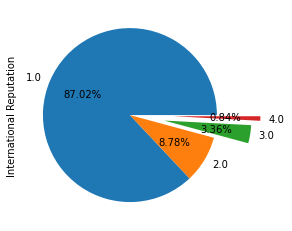

In [48]:
data2.value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0,0.4,0.5])
plt.show()

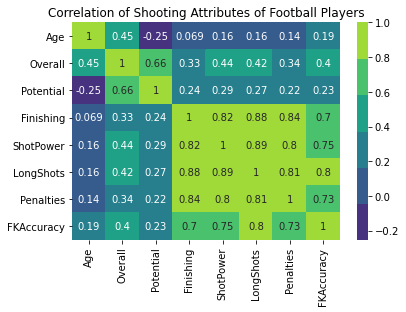

In [49]:
data['Jersey Number'] = data['Jersey Number'].values.astype(int)
dfcorr = data[['Age', 'Overall', 'Potential', 'Finishing', 'ShotPower', 'LongShots', 'Penalties', 'FKAccuracy']].corr()
cmap = sns.color_palette('viridis')
f = sns.heatmap(dfcorr, annot = True, cmap = cmap)
f.set_title('Correlation of Shooting Attributes of Football Players', fontsize = 12)
plt.show()

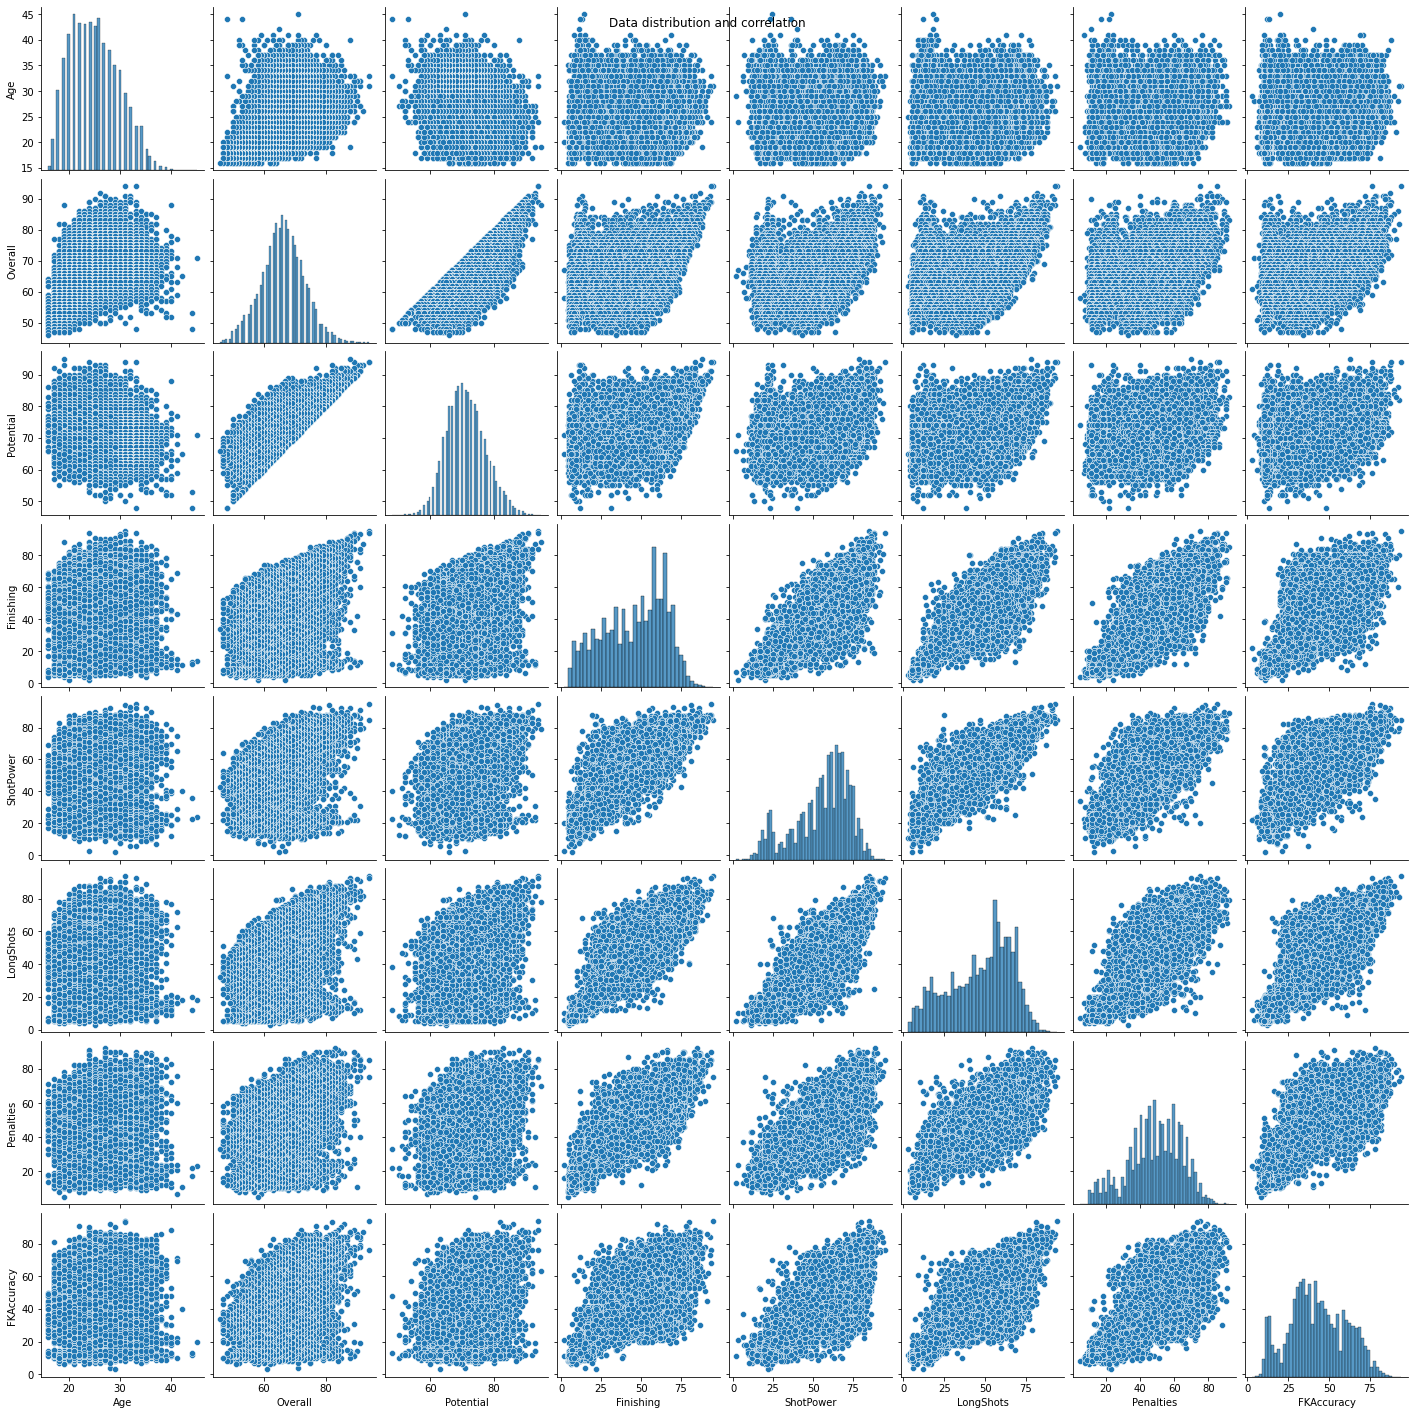

In [50]:
d = sns.pairplot(data[['Age', 'Overall', 'Potential', 'Finishing', 'ShotPower', 'LongShots', 'Penalties', 'FKAccuracy']]);
d.fig.suptitle('Data distribution and correlation')
plt.show()

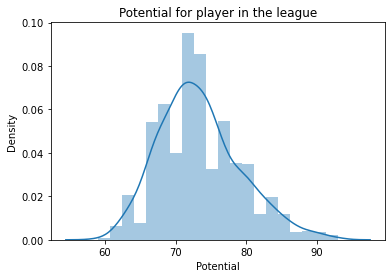

In [51]:
n = sns.distplot(data[data['Nationality'] == 'Brazil']['Potential']);
n.set_title('Potential for player in the league', fontsize = 12)
plt.show()

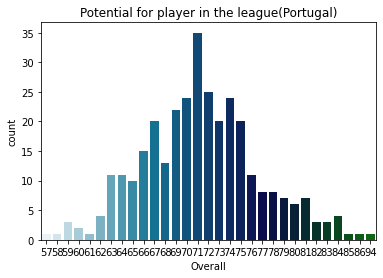

In [52]:
n = sns.countplot(data[data['Nationality'] == 'Portugal']['Overall'], palette='ocean_r');
n.set_title('Potential for player in the league(Portugal)', fontsize = 12)
plt.show()

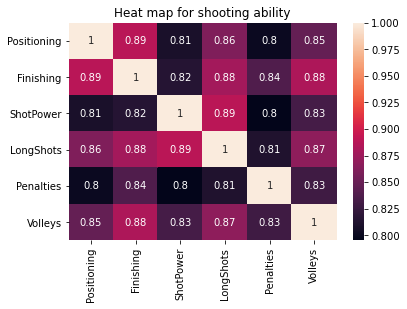

In [53]:
columns=data[['Positioning', 'Finishing', 'ShotPower', 'LongShots', 'Penalties', 'Volleys']]
att_corr = columns.corr()
s = sns.heatmap(att_corr, annot = True)
s.set_title('Heat map for shooting ability')
plt.show()

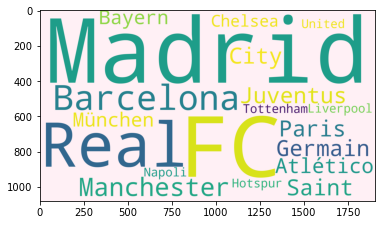

In [54]:
from wordcloud import WordCloud  
#the name of the club
wordcloud = WordCloud(
                          background_color='lavenderblush',
                          width=1900,
                          height=1080
                         ).generate(" ".join(data.Club[0:30]))
plt.imshow(wordcloud)
plt.show()

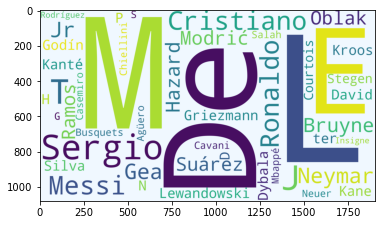

In [55]:
wordcloud = WordCloud(
                          background_color='aliceblue',
                          width=1900,
                          height=1080
                         ).generate(" ".join(data.Name[0:30]))
plt.imshow(wordcloud)
plt.show()

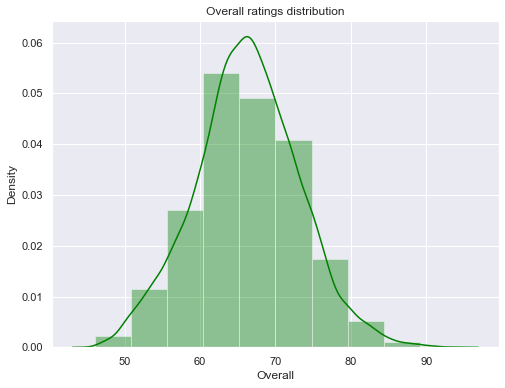

In [56]:
sns.set(rc={"figure.figsize": (8, 6)})
plt.title("Overall ratings distribution")
ax = sns.distplot(data["Overall"],color="green",bins=10,kde=True)
plt.show()

In [57]:
# we observe that most of the players have mean ratings of 65 as most of the values are
# concentrated towards the neam and the graph follows a normal distribution by forming a bell
# shaped curve.

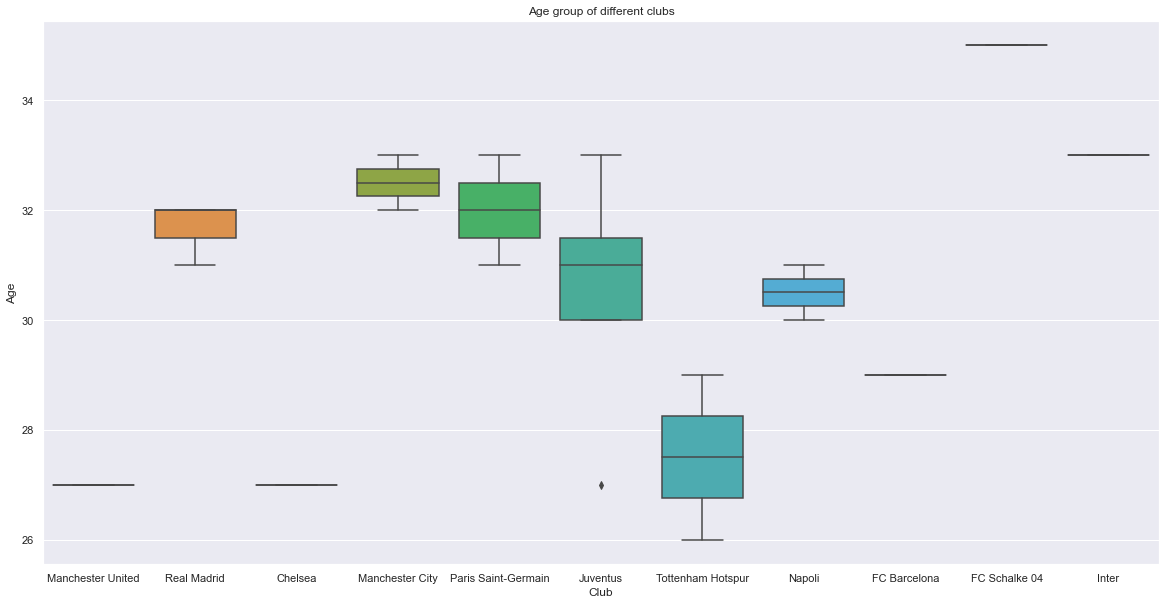

In [58]:
sns.set(rc={"figure.figsize": (20,10)})
sns.boxplot(x="Club", y="Age", data=top)
plt.title("Age group of different clubs")
plt.show()

age of oldest player is :  45
age of youngest player is :  16
average age of players is :  25.122205745043114


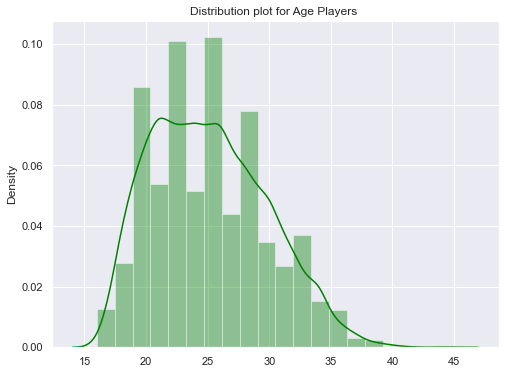

In [59]:
sns.set(rc={"figure.figsize": (8, 6)})
plt.title("Distribution plot for Age Players ")
x=sns.distplot(x=data["Age"],color="green",bins=20,kde=True)
print("age of oldest player is : ", data["Age"].max())
print("age of youngest player is : ", data["Age"].min())
print("average age of players is : ", data["Age"].mean())
plt.show()

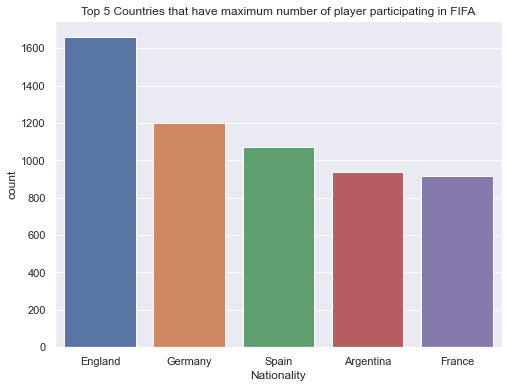

In [60]:
sns.countplot("Nationality", data=data, order=data["Nationality"].value_counts().index[:5])
plt.title("Top 5 Countries that have maximum number of player participating in FIFA")
plt.show()

In [61]:
data["Nationality"].value_counts().head()

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

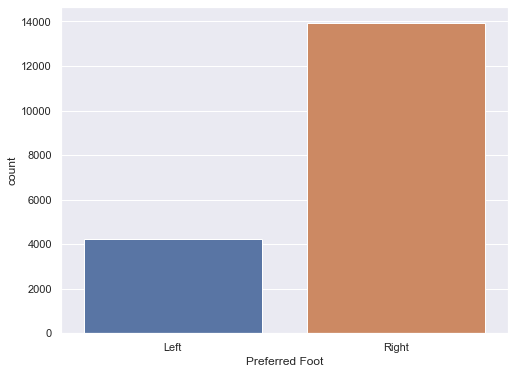

In [62]:
sns.countplot("Preferred Foot", data=data)
plt.show()

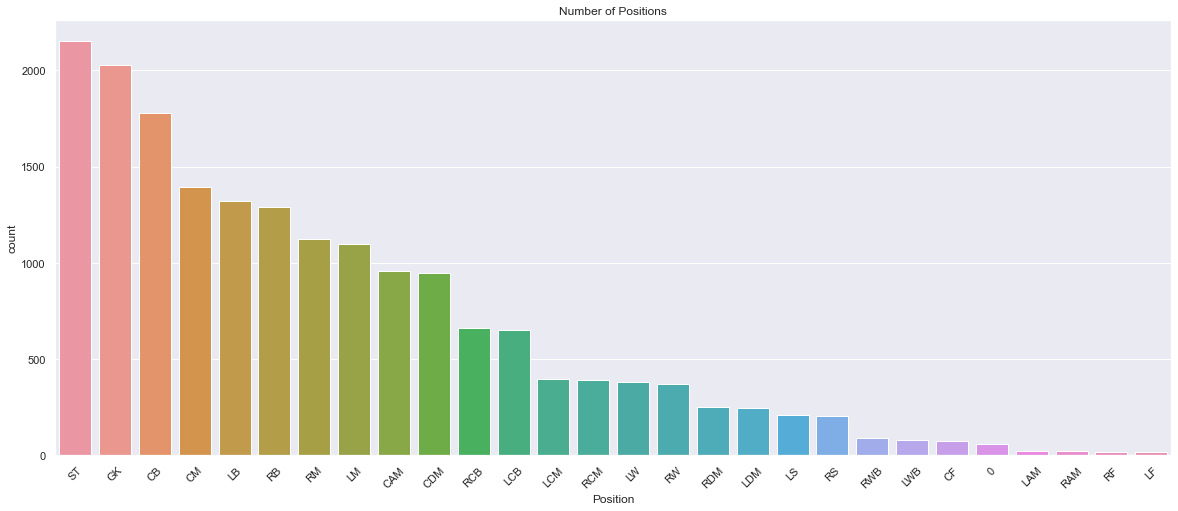

In [63]:
plt.subplots(figsize=(20,8))
sns.countplot("Position", data=data, order=data["Position"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Positions")
plt.show()

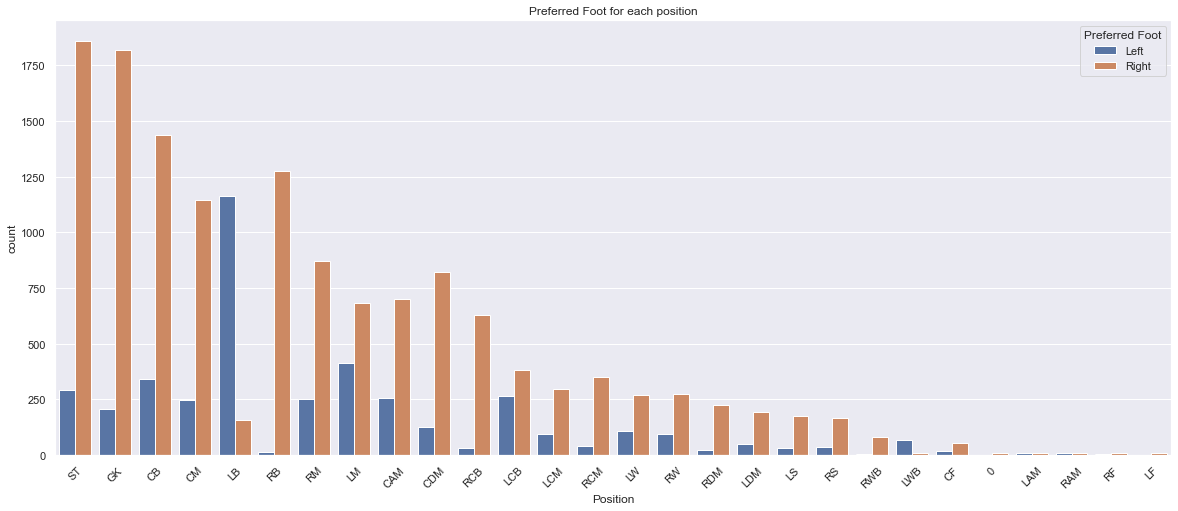

In [64]:
plt.subplots(figsize=(20,8))
sns.countplot(x="Position",hue="Preferred Foot", data=data,order=data["Position"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Preferred Foot for each position")
plt.show()

In [65]:
unique_counts = data.nunique()
lowest_distinct = unique_counts.min()
lowest_distinct_columns = unique_counts[unique_counts == lowest_distinct].index.tolist()
result = pd.DataFrame({col: data[col].unique() for col in lowest_distinct_columns})
result

Preferred Foot Real Face  Release_Clause_Class
0           Left       Yes                   1.0
1          Right        No                   NaN
2            NaN       NaN                   0.0

In [66]:
data = data.dropna(subset=['Preferred Foot', 'Real Face', 'Release Clause'], how='all')

In [67]:
def height(x):
    if x>=5 and x<=6:
        return 'short'
    elif x>6:
        return 'tall'   
data["height_group"] = data["Height"].apply(height)
def w(x):
    if x>=100 and x<=150:
        return 'under'
    elif x>150 and x<=200:
        return 'average'
    elif x>200:
        return 'over'   
data["weight_group"] = data["Weight"].apply(w)
data

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club        Value      Wage  Special  ... SlidingTackle  \
0             FC Barcelona  110500000.0  565000.0     2202  ...          26.0   
1                 Juventus   77000000.0  405000.0     2228  ...          23.0   
2      Paris Saint-Germain  118500000.0  290000.0     2143  ...          33.0   
3        Manchester United   72000000.0  260000.0     1471  ...          13.0   
4          Manchester City  102000000.0  355000.0     2281  ...          51.0   
...                    ...          ...       ...      ...  ...           ...   
18202      Crewe Alexandra      60000.0    1000.0     1307  ...          47.0   
18203       Trelleborgs FF      60000.0    1000.0     1098  ...          19.0   
18204     Cambridge United      60000.0    1000.0     1189  ...          11.0   
18205      Tranmere Rovers      60000.0    1000.0     1228  ...          27.0   
18206      Tranmere Rovers      60000.0    1000.0     1321  ...          50.0   

       GKDiving  GKHandling  GKKicking GKPositioning GKReflexes  \
0           6.0        11.0       15.0          14.0        8.0   
1           7.0        11.0       15.0          14.0       11.0   
2           9.0         9.0       15.0          15.0       11.0   
3          90.0        85.0       87.0          88.0       94.0   
4          15.0        13.0        5.0          10.0       13.0   
...         ...         ...        ...           ...        ...   
18202      10.0        13.0        7.0           8.0        9.0   
18203      10.0         9.0        9.0           5.0       12.0   
18204       6.0         5.0       10.0           6.0       13.0   
18205      14.0         6.0       14.0           8.0        9.0   
18206      10.0        15.0        9.0          12.0        9.0   

      Release Clause Release_Clause_Class  height_group  weight_group  
0        226500000.0                  1.0         short       average  
1        127100000.0                  1.0          tall       average  
2        228100000.0                  1.0         short         under  
3        138600000.0                  1.0          tall       average  
4        196400000.0                  1.0         short       average  
...              ...                  ...           ...           ...  
18202       143000.0                  0.0         short         under  
18203       113000.0                  0.0          tall       average  
18204       165000.0                  0.0         short         under  
18205       143000.0                  0.0         short       average  
18206       165000.0                  0.0         short       average  

[18159 rows x 88 columns]

In [68]:
data["Height"].min()

5.083333333333333

In [69]:
data["Height"].max()

6.75

In [70]:
data[data["Height"]==5.083333333333333]

ID          Name  Age Nationality  Overall  Potential  \
6275   237994    N. Barrios   20   Argentina       69         82   
6584   232951   H. Nakagawa   23       Japan       69         72   
17157  242566  K. Yamaguchi   23       Japan       55         61   

                         Club      Value    Wage  Special  ... SlidingTackle  \
6275   San Lorenzo de Almagro  2000000.0  7000.0     1687  ...          51.0   
6584           Kashiwa Reysol  1300000.0  5000.0     1740  ...          31.0   
17157         Shonan Bellmare   120000.0  1000.0     1383  ...          13.0   

       GKDiving  GKHandling  GKKicking GKPositioning GKReflexes  \
6275       13.0         8.0        7.0          12.0        6.0   
6584       15.0        10.0        7.0          12.0       13.0   
17157      14.0         5.0       15.0           9.0       14.0   

      Release Clause Release_Clause_Class  height_group  weight_group  
6275       4300000.0                  1.0         short         under  
6584       1800000.0                  1.0         short         under  
17157       174000.0                  0.0         short         under  

[3 rows x 88 columns]

In [71]:
data[data["Height"]==6.75]

ID       Name  Age     Nationality  Overall  Potential  \
11614  199321    T. Holý   26  Czech Republic       64         68   
17927  243796  D. Hodzic   22         Croatia       51         61   

                 Club     Value    Wage  Special  ... SlidingTackle  GKDiving  \
11614      Gillingham  400000.0  2000.0     1028  ...          25.0      68.0   
17927  Vejle Boldklub   50000.0  1000.0      793  ...          11.0      50.0   

       GKHandling  GKKicking GKPositioning GKReflexes Release Clause  \
11614        58.0       57.0          63.0       68.0       730000.0   
17927        47.0       56.0          52.0       58.0        73000.0   

      Release_Clause_Class  height_group  weight_group  
11614                  0.0          tall          over  
17927                  0.0          tall       average  

[2 rows x 88 columns]

In [72]:
data["Weight"].min()

110.0

In [73]:
data["Weight"].max()

243.0

In [74]:
data[data["Weight"]==110.0]

ID           Name  Age   Nationality  Overall  Potential  \
13338  235600  B. Al Mutairi   28  Saudi Arabia       62         62   
17157  242566   K. Yamaguchi   23         Japan       55         61   

                  Club     Value    Wage  Special  ... SlidingTackle  \
13338         Al Batin  240000.0  3000.0     1522  ...          56.0   
17157  Shonan Bellmare  120000.0  1000.0     1383  ...          13.0   

       GKDiving  GKHandling  GKKicking GKPositioning GKReflexes  \
13338       7.0         6.0       13.0           8.0        9.0   
17157      14.0         5.0       15.0           9.0       14.0   

      Release Clause Release_Clause_Class  height_group  weight_group  
13338       396000.0                  0.0         short         under  
17157       174000.0                  0.0         short         under  

[2 rows x 88 columns]

In [75]:
data[data["Weight"]==243.0]

ID          Name  Age Nationality  Overall  Potential  \
9501  156321  A. Akinfenwa   36     England       66         66   

                   Club     Value    Wage  Special  ... SlidingTackle  \
9501  Wycombe Wanderers  230000.0  2000.0     1586  ...          24.0   

      GKDiving  GKHandling  GKKicking GKPositioning GKReflexes Release Clause  \
9501      14.0         7.0       15.0           6.0       16.0       403000.0   

     Release_Clause_Class  height_group  weight_group  
9501                  0.0         short          over  

[1 rows x 88 columns]

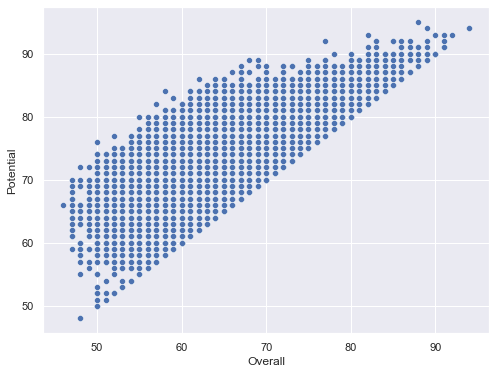

In [76]:
sns.scatterplot(x=data["Overall"],y=data["Potential"],data=data)
plt.show()

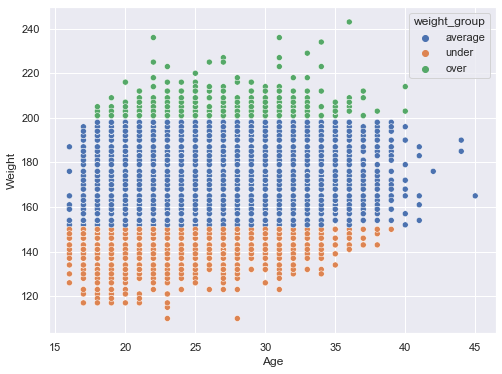

In [77]:
sns.scatterplot(x=data["Age"],y=data["Weight"],hue="weight_group",data=data)
plt.show()

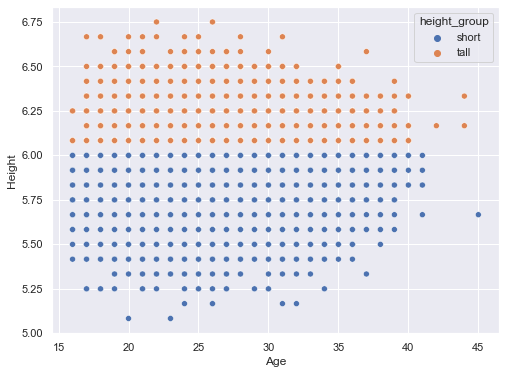

In [78]:
sns.scatterplot(x=data["Age"],y=data["Height"],hue="height_group",data=data)
plt.show()

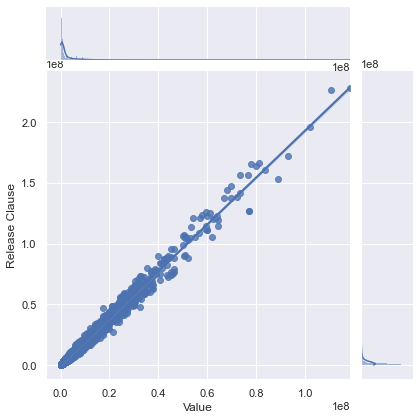

In [79]:
sns.jointplot(x="Value", y='Release Clause', data=data, kind="reg")
plt.show()

HYPOTHESIS TESTING USING ANOVA MODEL

In [80]:
# STATISTICAL ANALYSIS FOR SIGNIFICANT COLUMNS WITH THE TARGET VARIABLE

In [81]:
data = data[data['Release Clause'].notna()]
data=data.drop(['Name',"Contract Valid Until",'Nationality','Club','Loaned From'],axis=1)
data.rename(columns = {'Release Clause':'Release_Clause', 
                       'International Reputation':'International_Reputation',
                      'Preferred Foot':'Preferred_Foot','Work Rate':'Work_Rate','Body Type':'Body_Type',
                      'Real Face':'Real_Face'}, inplace = True)
#Hypothesis : 
#Null Hypothesis : all columns have no relation with target column release clause.
#Alternative Hypothesis : all columns have relation with target column release clause.
import statsmodels.api as sm
from statsmodels.formula.api import ols
alpha=0.05

In [82]:
formula="Release_Clause~Preferred_Foot+Work_Rate+Body_Type+Real_Face+LS+ST+RS+LW+LF+CF+RF+RW+LAM+CAM+RAM+LM+LCM+CM+RCM+RM+LWB+LDM+CDM+RDM+RWB+LB+LCB+CB+RCB+RB"
model=ols(formula,data).fit()
anova_table=sm.stats.anova_lm(model)
anova_table

df        sum_sq       mean_sq             F  \
Preferred_Foot      1.0  9.211936e+13  9.211936e+13     12.270606   
Work_Rate           8.0  6.436400e+16  8.045500e+15   1071.687445   
Body_Type           9.0  1.434740e+17  1.594156e+16   2123.468358   
Real_Face           1.0  3.323812e+17  3.323812e+17  44274.280951   
LS                 92.0  7.522404e+17  8.176527e+15   1089.140618   
ST                 92.0  1.411177e+17  1.533888e+15    204.318998   
RS                 92.0  5.935478e+16  6.451606e+14     85.937551   
LW                104.0  1.153188e+17  1.108834e+15    147.700438   
LF                101.0  2.325585e+16  2.302559e+14     30.670859   
CF                101.0  1.603498e+16  1.587622e+14     21.147657   
RF                101.0  1.254903e+16  1.242478e+14     16.550226   
RW                104.0  1.951274e+16  1.876225e+14     24.991945   
LAM                99.0  2.061221e+16  2.082041e+14     27.733482   
CAM                99.0  5.757515e+15  5.815671e+13      7.746668   
RAM                99.0  4.539872e+15  4.585729e+13      6.108344   
LM                 99.0  2.494914e+16  2.520115e+14     33.568768   
LCM                91.0  1.247562e+16  1.370947e+14     18.261477   
CM                 91.0  3.627437e+15  3.986194e+13      5.309744   
RCM                91.0  3.020967e+15  3.319744e+13      4.422010   
RM                 99.0  3.987367e+15  4.027644e+13      5.364956   
LWB                94.0  2.530394e+16  2.691909e+14     35.857124   
LDM                98.0  2.352521e+16  2.400532e+14     31.975881   
CDM                98.0  2.025530e+15  2.066868e+13      2.753137   
RDM                98.0  1.445686e+15  1.475190e+13      1.965002   
RWB                94.0  1.684679e+15  1.792212e+13      2.387286   
LB                 97.0  6.937115e+15  7.151665e+13      9.526256   
LCB               107.0  1.069029e+16  9.990925e+13     13.308245   
CB                107.0  1.156577e+15  1.080913e+13      1.439812   
RCB               107.0  1.231660e+15  1.151084e+13      1.533283   
RB                 97.0  1.584876e+15  1.633893e+13      2.176400   
Residual        13880.0  1.042016e+17  7.507319e+12           NaN   

                       PR(>F)  
Preferred_Foot   4.615968e-04  
Work_Rate        0.000000e+00  
Body_Type        0.000000e+00  
Real_Face        0.000000e+00  
LS               0.000000e+00  
ST               0.000000e+00  
RS               0.000000e+00  
LW               0.000000e+00  
LF               0.000000e+00  
CF               0.000000e+00  
RF              8.715449e-265  
RW               0.000000e+00  
LAM              0.000000e+00  
CAM             1.890903e-100  
RAM              1.217663e-71  
LM               0.000000e+00  
LCM             5.449000e-269  
CM               1.410508e-53  
RCM              5.523913e-40  
RM               6.666580e-59  
LWB              0.000000e+00  
LDM              0.000000e+00  
CDM              9.590235e-18  
RDM              4.633087e-08  
RWB              1.556629e-12  
LB              7.100463e-130  
LCB             3.320728e-216  
CB               2.064879e-03  
RCB              3.472934e-04  
RB               2.401565e-10  
Residual                  NaN

In [83]:
data.rename(columns = {'Skill Moves':'Skill_Moves', 
                       'Jersey Number':'Jersey_Number',"Weak Foot":"Weak_Foot"}, inplace = True)
formula="Release_Clause~ID+Age+Overall+Potential+Value+Wage+Special+International_Reputation+Weak_Foot+Skill_Moves+Jersey_Number+Joined+Height+Weight+Crossing+Finishing+HeadingAccuracy+ShortPassing+Volleys+Dribbling+Curve+FKAccuracy+LongPassing+BallControl+Acceleration+SprintSpeed+Agility+Reactions+Balance+ShotPower+Jumping+Stamina+Strength+LongShots+Aggression+Interceptions+Positioning+Vision+Penalties+Composure+Marking+StandingTackle+SlidingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes+Release_Clause+Release_Clause_Class"
model1=ols(formula,data).fit()
anova_table=sm.stats.anova_lm(model1)
anova_table

df        sum_sq       mean_sq             F  \
ID                            1.0  3.186724e+16  3.186724e+16  1.887392e+30   
Age                           1.0  4.347045e+15  4.347045e+15  2.574612e+29   
Overall                       1.0  8.811104e+17  8.811104e+17  5.218527e+31   
Potential                     1.0  3.935338e+15  3.935338e+15  2.330771e+29   
Value                         1.0  1.113597e+18  1.113597e+18  6.595466e+31   
Wage                          1.0  1.367961e+12  1.367961e+12  8.101983e+25   
Special                       1.0  6.879636e+12  6.879636e+12  4.074582e+26   
International_Reputation      1.0  4.767015e+14  4.767015e+14  2.823346e+28   
Weak_Foot                     1.0  6.982612e+12  6.982612e+12  4.135571e+26   
Skill_Moves                   1.0  2.099998e+12  2.099998e+12  1.243760e+26   
Jersey_Number                 1.0  9.371773e+11  9.371773e+11  5.550593e+25   
Joined                        1.0  1.409548e+12  1.409548e+12  8.348290e+25   
Height                        1.0  3.852702e+11  3.852702e+11  2.281829e+25   
Weight                        1.0  9.899069e+12  9.899069e+12  5.862893e+26   
Crossing                      1.0  1.273477e+13  1.273477e+13  7.542386e+26   
Finishing                     1.0  2.577620e+11  2.577620e+11  1.526640e+25   
HeadingAccuracy               1.0  2.057215e+12  2.057215e+12  1.218421e+26   
ShortPassing                  1.0  4.869222e+12  4.869222e+12  2.883880e+26   
Volleys                       1.0  4.935939e+13  4.935939e+13  2.923394e+27   
Dribbling                     1.0  8.299397e+11  8.299397e+11  4.915459e+25   
Curve                         1.0  2.385555e+12  2.385555e+12  1.412886e+26   
FKAccuracy                    1.0  4.133019e+12  4.133019e+12  2.447851e+26   
LongPassing                   1.0  2.423739e+12  2.423739e+12  1.435501e+26   
BallControl                   1.0  1.404956e+11  1.404956e+11  8.321093e+24   
Acceleration                  1.0  1.078754e+13  1.078754e+13  6.389102e+26   
SprintSpeed                   1.0  1.251606e+12  1.251606e+12  7.412851e+25   
Agility                       1.0  6.994169e+12  6.994169e+12  4.142416e+26   
Reactions                     1.0  8.916389e+11  8.916389e+11  5.280884e+25   
Balance                       1.0  4.852614e+11  4.852614e+11  2.874043e+25   
ShotPower                     1.0  5.604731e+11  5.604731e+11  3.319498e+25   
Jumping                       1.0  6.057224e+11  6.057224e+11  3.587495e+25   
Stamina                       1.0  6.685164e+13  6.685164e+13  3.959402e+27   
Strength                      1.0  1.536528e+12  1.536528e+12  9.100352e+25   
LongShots                     1.0  1.564985e+11  1.564985e+11  9.268891e+24   
Aggression                    1.0  5.726018e+11  5.726018e+11  3.391332e+25   
Interceptions                 1.0  2.526161e+09  2.526161e+09  1.496162e+23   
Positioning                   1.0  5.407311e+12  5.407311e+12  3.202572e+26   
Vision                        1.0  9.000446e+12  9.000446e+12  5.330668e+26   
Penalties                     1.0  5.567293e+12  5.567293e+12  3.297325e+26   
Composure                     1.0  1.489117e+09  1.489117e+09  8.819552e+22   
Marking                       1.0  4.481368e+12  4.481368e+12  2.654167e+26   
StandingTackle                1.0  1.326401e+13  1.326401e+13  7.855837e+26   
SlidingTackle                 1.0  3.380766e+11  3.380766e+11  2.002316e+25   
GKDiving                      1.0  9.100301e+10  9.100301e+10  5.389809e+24   
GKHandling                    1.0  2.544972e+12  2.544972e+12  1.507303e+26   
GKKicking                     1.0  4.993807e+10  4.993807e+10  2.957667e+24   
GKPositioning                 1.0  3.515378e+11  3.515378e+11  2.082043e+25   
GKReflexes                    1.0  5.480415e+10  5.480415e+10  3.245869e+24   
Release_Clause                1.0  2.180764e+16  2.180764e+16  1.291595e+30   
Release_Clause_Class          1.0  1.002670e-15  1.002670e-15  5.938485e-02   
Re

ONE SAMPLE T TEST

In [84]:
# h0: there is no difference in population mean and sample mean 
#      (mu_population_mean=mu_sample_mean )
        #H0: mu>=4585060.98
# h1: there is no difference in population mean and sample mean 
#      (mu_population_mean!=mu_sample_mean)
        #H1: mu<4585060.98

In [85]:
data["Release_Clause"].mean()

4585060.986600974

In [86]:
x=data["Release_Clause"].sample(n=5000)
x.mean()

4588689.2

In [87]:
x=pd.DataFrame(x)
x.isna().sum()

Release_Clause    0
dtype: int64

In [88]:
x=x.dropna(how="all")

In [89]:
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power
print('Mean is %2.1f Sd is %2.1f' % (x["Release_Clause"].mean(),np.std(x["Release_Clause"],ddof = 1)))

Mean is 4588689.2 Sd is 10423659.0


In [90]:
t_statistic, p_value = ttest_1samp(x["Release_Clause"],4585060.98)
print(t_statistic, p_value)

0.024612652513128507 0.9803649094834173


In [91]:
alpha=0.05
pvalue=p_value
if pvalue<alpha:
    print("reject null and accept alternate")
else:
    print("fail to reject null")

fail to reject null


WHEN POPULATION STANDARD DEVIATION IS NOT GIVEN

In [92]:
import scipy.stats as stats
mu = 4585060.98
xbar = x["Release_Clause"].mean()
n= 5000
s=np.std(x["Release_Clause"],ddof = 1)
std_error = s/np.sqrt(n)
t_stat = (xbar - mu)/std_error
t_crit=stats.t.ppf(0.025,n-1)
print( t_stat,t_crit)

0.02461265251312801 -1.9604386466615247


In [93]:
pvalue=stats.t.sf(t_stat,n-1)*2
pvalue

0.9803649094834177

CONFIDENCE INTERVAL

In [94]:
import math
n=len(x["Release_Clause"])
xbar=np.mean(x["Release_Clause"])
pop_stdev=np.std(x["Release_Clause"],ddof=1)
z_critical=stats.norm.isf(0.05)
std_error=pop_stdev/math.sqrt(n)
marginal_error=z_critical*std_error
confidence_interval=(xbar-marginal_error,xbar+marginal_error)
print("confidence interval is : ",confidence_interval)

confidence interval is :  (4346216.722757076, 4831161.677242924)


In [95]:
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
import scipy
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway

TWO SAMPLE T TEST

In [96]:
# h0: there is no difference in release clause of players who are short and tall in height group
#      (mu_tall=mu_short )
# h1: tthere is no difference in release clause of players who are short and tall in height group
#      (mu_tall!=mu_short )

In [97]:
# significance level
alpha=0.05
short=data[data["height_group"]=="short"]["Release_Clause"]
tall=data[data["height_group"]=="tall"]["Release_Clause"]
short=short.dropna(how="all")
tall=tall.dropna(how="all")
f_oneway(short,tall)

F_onewayResult(statistic=2.4869645622759378, pvalue=0.11481193892622046)

In [98]:
# using ols
formula="Release_Clause~height_group"
model=ols(formula,data).fit()
anova_table=anova_lm(model)
anova_table

df        sum_sq       mean_sq         F    PR(>F)
height_group      1.0  3.074257e+14  3.074257e+14  2.486965  0.114812
Residual      16641.0  2.057075e+18  1.236148e+14       NaN       NaN

In [99]:
# Using two sample independent ttest
t,p=stats.ttest_ind(short,tall)
print("test_statistic : ",t)
print("p value : ",p)

test_statistic :  -1.577011275253272
p value :  0.11481193892688972


In [100]:
# manual approach
alpha=0.05
n1=len(short)
n2=len(tall)
mean1=np.mean(short)
mean2=np.mean(tall)
sd1=np.std(short,ddof=1)
sd2=np.std(tall,ddof=1)
se1=sd1/np.sqrt(n1)
se2=sd2/np.sqrt(n2)
se=np.sqrt((se1**2+se2**2))
print("Standard Error:",se)
tstats=(mean1-mean2)/se
print("tstats:",tstats)
tcrit=stats.t.isf(alpha/2,n1+n2-2)
print("tcritical:",tcrit)
print("p value",round(2*stats.t.cdf(tstats,n1+n2-2),2))

Standard Error: 182738.55366884512
tstats: -1.5798464147935405
tcritical: 1.9601065505427373
p value 0.11


In [101]:
p_value=0.11
alpha=0.05
if pvalue<alpha:
    print("reject null and accept alternate")
else:
    print("fail to reject null")

fail to reject null


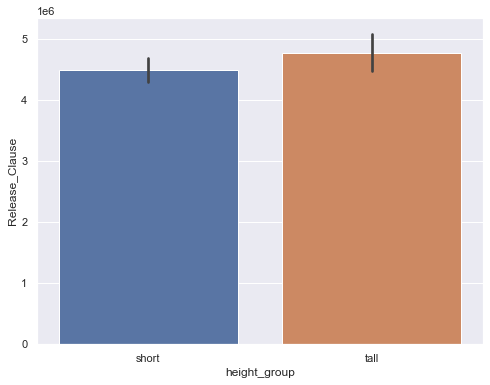

In [102]:
sns.barplot(x="height_group",y="Release_Clause",data=data)
plt.show()

In [103]:
n=len(short)
xbar=np.mean(short)
pop_stdev=np.std(short,ddof=1)
z_critical=stats.norm.isf(0.05)
std_error=pop_stdev/math.sqrt(n)
marginal_error=z_critical*std_error
confidence_interval=(xbar-marginal_error,xbar+marginal_error)
print("confidence interval is : ",confidence_interval)

confidence interval is :  (4315651.609226293, 4663033.694144494)


In [104]:
n=len(tall)
xbar=np.mean(tall)
pop_stdev=np.std(tall,ddof=1)
z_critical=stats.norm.isf(0.05)
std_error=pop_stdev/math.sqrt(n)
marginal_error=z_critical*std_error
confidence_interval=(xbar-marginal_error,xbar+marginal_error)
print("confidence interval is : ",confidence_interval)

confidence interval is :  (4532728.10970477, 5023354.891382581)


CHI SQUARE

In [105]:
from scipy.stats import chi2_contingency

In [106]:
z=pd.crosstab(data["weight_group"],data["height_group"])
z

height_group  short  tall
weight_group             
average        8419  5144
over             12   323
under          2694    51

In [107]:
array = np.array([[9173,5626],[14,355],[2938,53]])
array

array([[9173, 5626],
       [  14,  355],
       [2938,   53]])

In [108]:
chi_sq_Stat, p, deg_freedom, exp_freq = stats.chi2_contingency(array)
print('Chi-square statistic %3.5f P value %1.6f' %(chi_sq_Stat, p))

if p< alpha:
    print('Reject Null hypothesis and Accept alternate')
else:
    print('Fail to reject Null')

Chi-square statistic 2146.43783 P value 0.000000
Reject Null hypothesis and Accept alternate


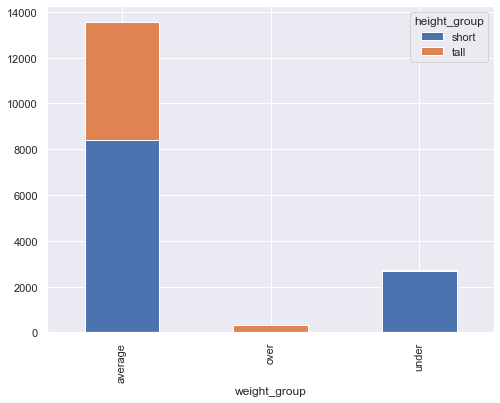

In [109]:
pd.crosstab(data["weight_group"],data["height_group"]).plot(kind="bar",stacked=True)
plt.show()

REGRESSION MODELLING - RELEASE CLAUSE (TARGET COLUMN)

In [110]:
data= data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [111]:
x=data.isna().sum()
y=x[x>0]
y

Series([], dtype: int64)

In [112]:
a=data.columns
print("all columns of the dataset are : \n ", a)
print("total number of columns in the dataset are : ", len(a))

all columns of the dataset are : 
  Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred_Foot', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position',
       'Jersey_Number', 'Joined', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       

In [113]:
cat=[col for col in data.columns if data[col].dtype=="object"]
print("categorical columns in the dataset are : ", cat,end=" ")
print("\ntotal number of categorical columns in the dataset are : ", len(cat))

categorical columns in the dataset are :  ['Preferred_Foot', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'height_group', 'weight_group'] 
total number of categorical columns in the dataset are :  33


In [114]:
num=[col for col in data.columns if data[col].dtype!="object"]
print("numerical columns in the dataset are : ", num,end=" ")
print("\ntotal number of numerical columns in the dataset are : ", len(num))

numerical columns in the dataset are :  ['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Jersey_Number', 'Joined', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release_Clause', 'Release_Clause_Class'] 
total number of numerical columns in the dataset are :  50


skewness for ID is :  -2.2294887370832686
kurtosis for ID is :  9.215202613907739


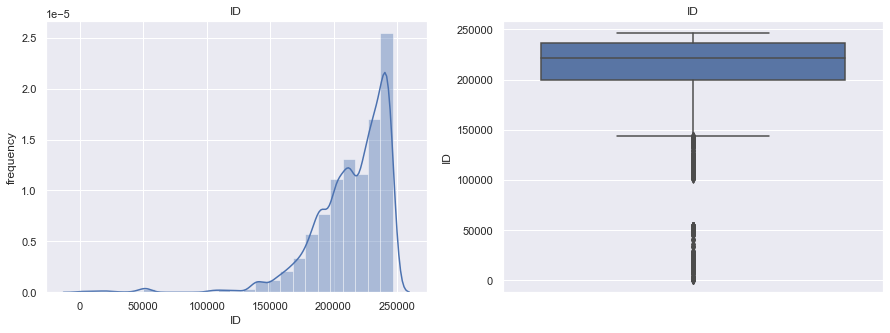

skewness for Age is :  0.33737127650526305
kurtosis for Age is :  -0.5558199895438887


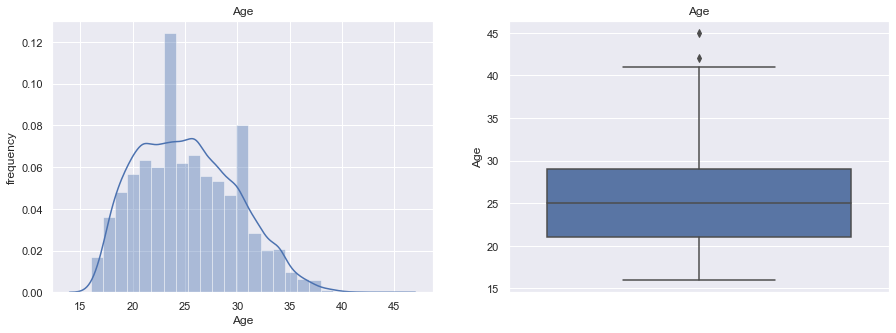

skewness for Overall is :  0.0840283889754774
kurtosis for Overall is :  0.0770865926594575


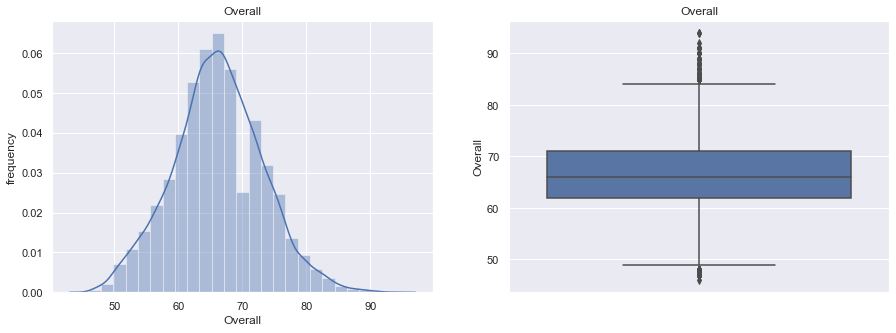

skewness for Potential is :  0.3135037536792178
kurtosis for Potential is :  0.07158722844751919


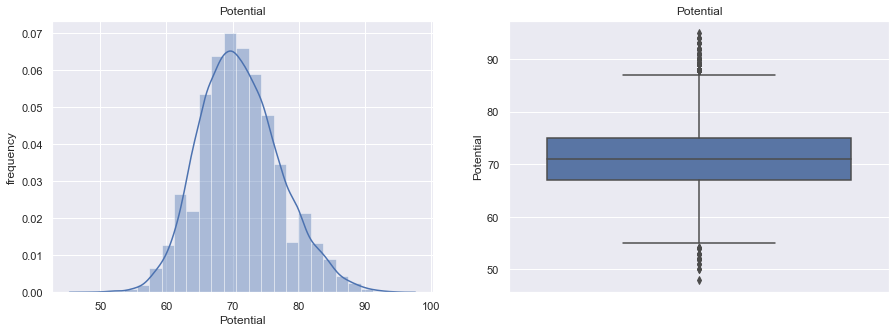

skewness for Value is :  7.001447183890468
kurtosis for Value is :  74.85414928231472


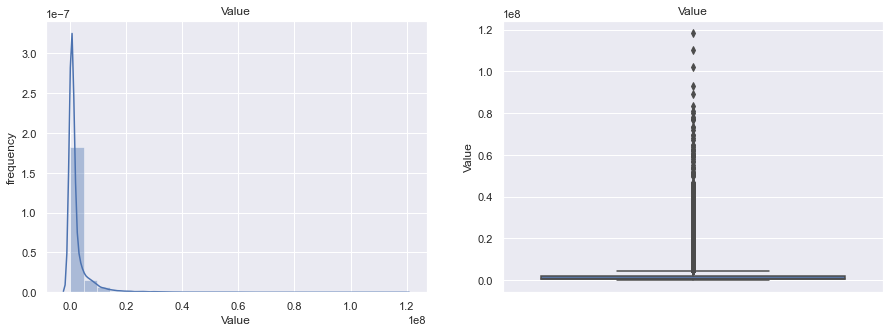

skewness for Wage is :  7.9694331748352925
kurtosis for Wage is :  101.42016347890001


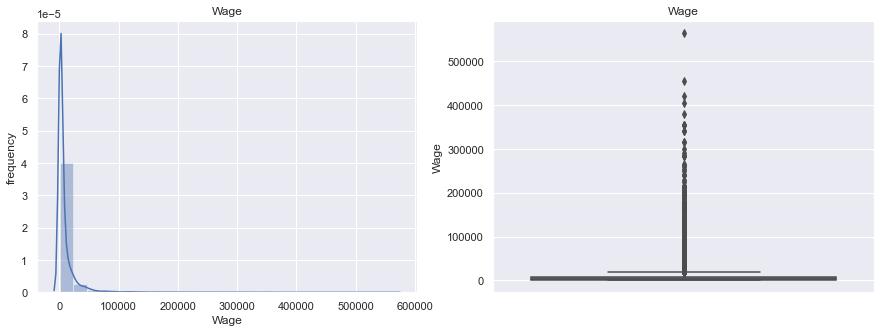

skewness for Special is :  -0.693448105158702
kurtosis for Special is :  0.2936432400114133


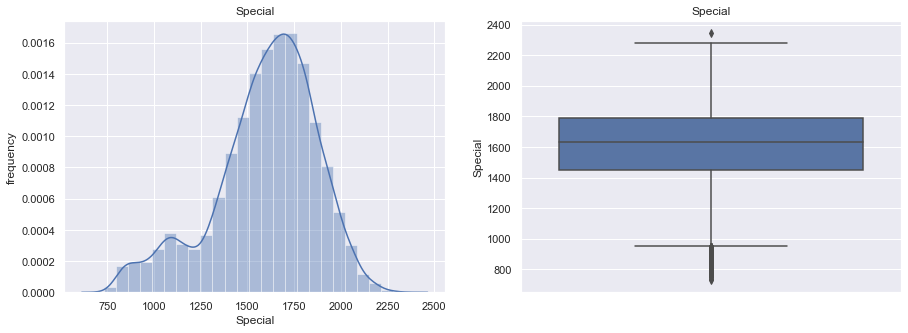

skewness for International_Reputation is :  4.052396631154956
kurtosis for International_Reputation is :  18.85426492020848


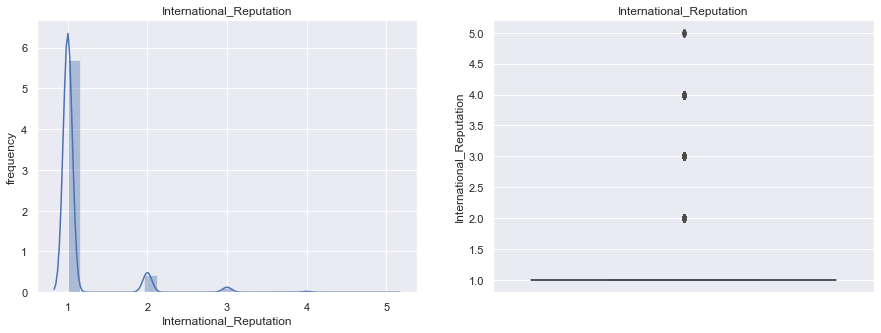

skewness for Weak_Foot is :  0.1292694771471369
kurtosis for Weak_Foot is :  0.6596875547151875


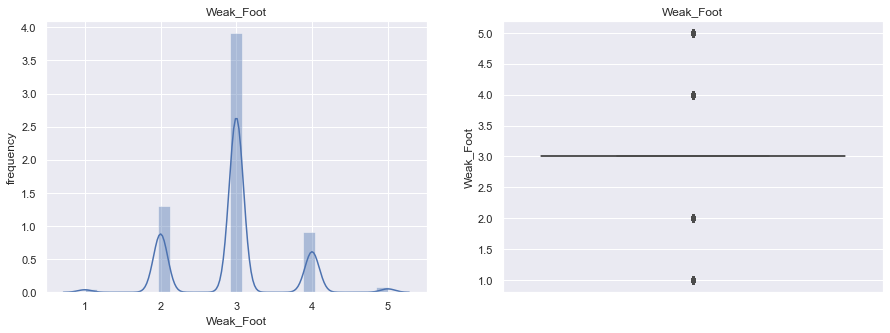

skewness for Skill_Moves is :  0.1657353238072117
kurtosis for Skill_Moves is :  -0.07337433001886362


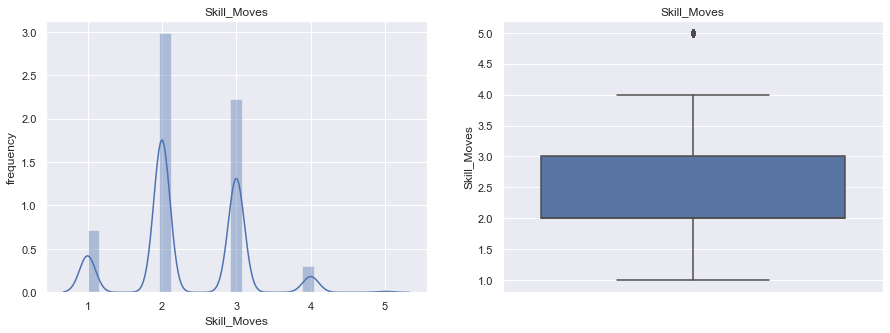

skewness for Jersey_Number is :  2.1580889916823938
kurtosis for Jersey_Number is :  6.9536622904917404


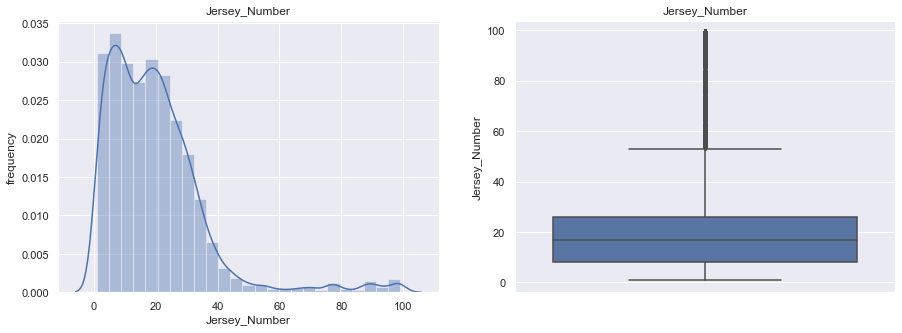

skewness for Joined is :  -2.520411469757906
kurtosis for Joined is :  9.983203243655023


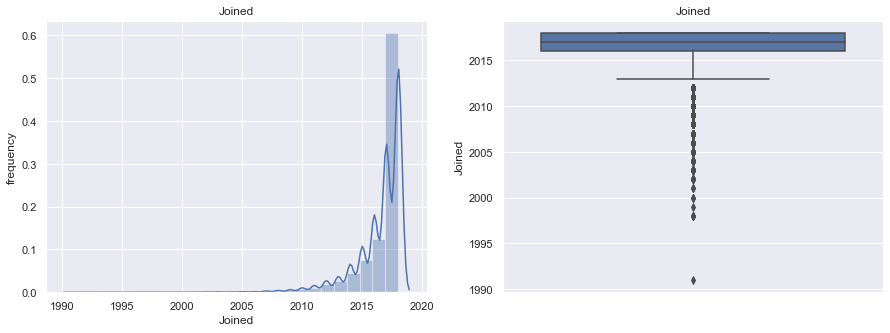

skewness for Height is :  -0.01362442958879466
kurtosis for Height is :  -0.20897479023326238


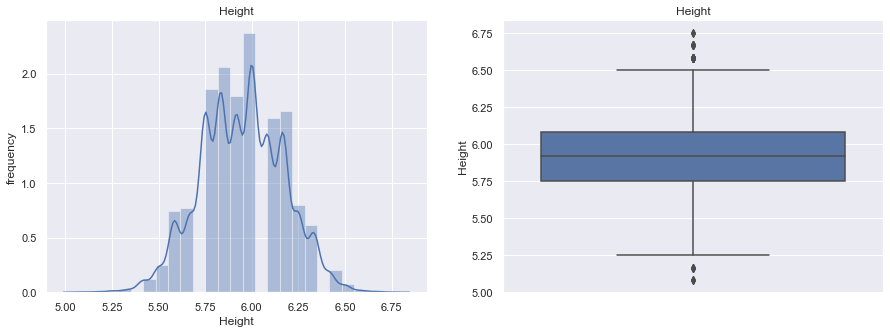

skewness for Weight is :  0.20964318644290506
kurtosis for Weight is :  0.08567097742716356


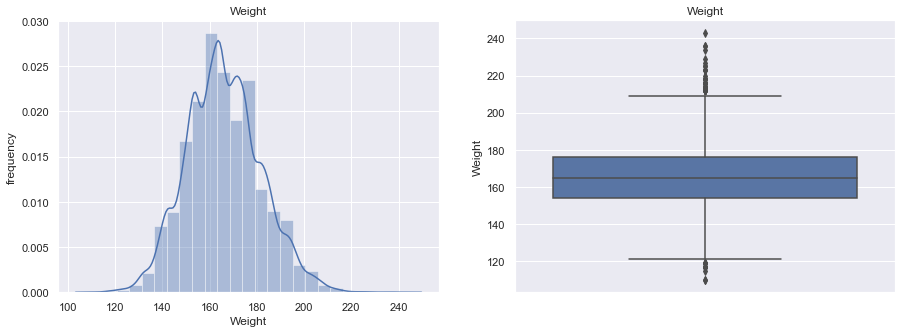

skewness for Crossing is :  -0.5828783953104434
kurtosis for Crossing is :  -0.5609433201811647


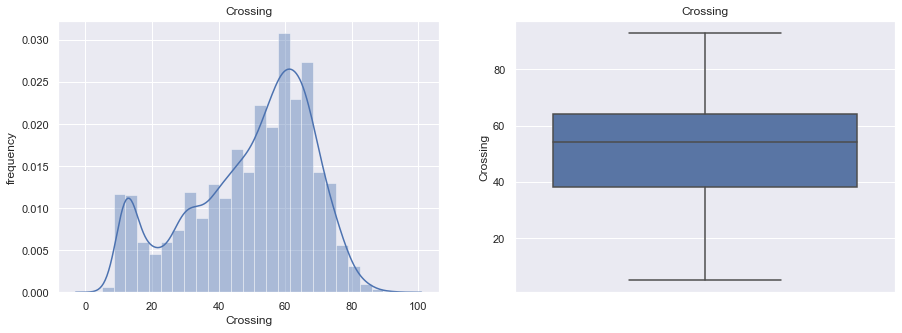

skewness for Finishing is :  -0.28745057253085654
kurtosis for Finishing is :  -0.9721998409108616


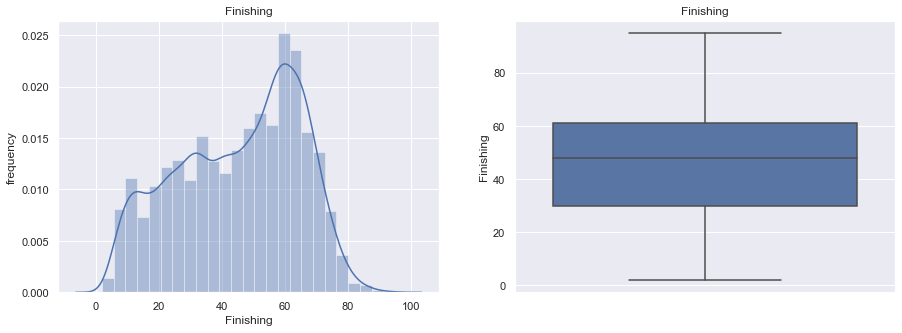

skewness for HeadingAccuracy is :  -0.8735304349427665
kurtosis for HeadingAccuracy is :  0.25682673771751663


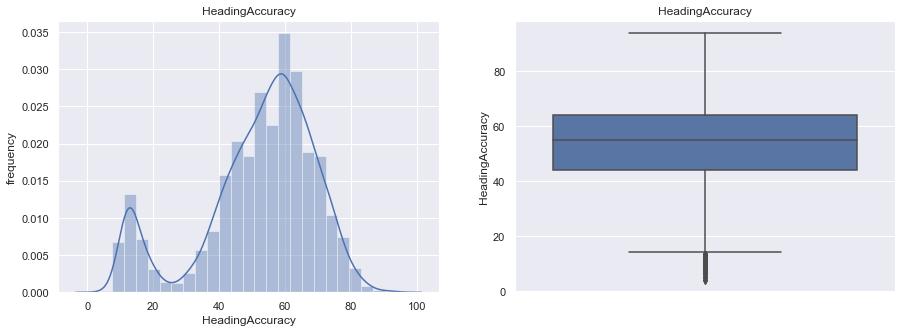

skewness for ShortPassing is :  -1.0819963062617242
kurtosis for ShortPassing is :  0.7331614857288584


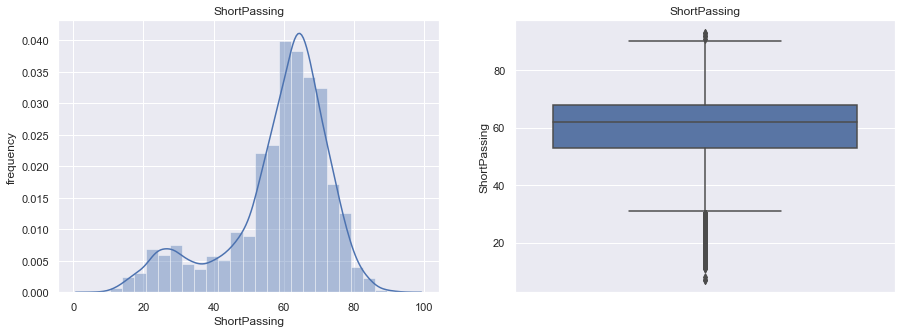

skewness for Volleys is :  -0.13883764268550222
kurtosis for Volleys is :  -0.720583540094692


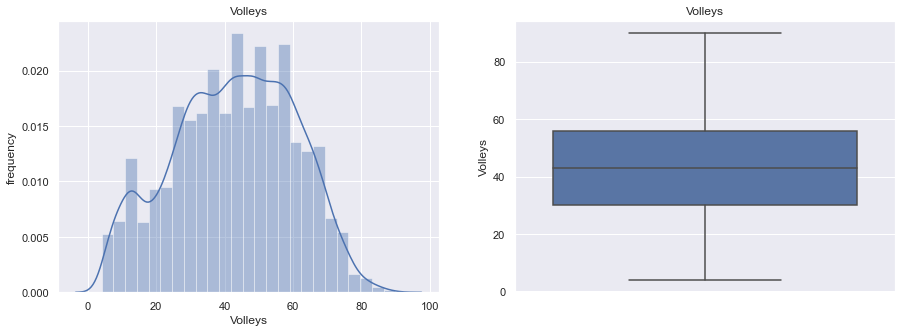

skewness for Dribbling is :  -1.0657752338192605
kurtosis for Dribbling is :  0.2848063442439166


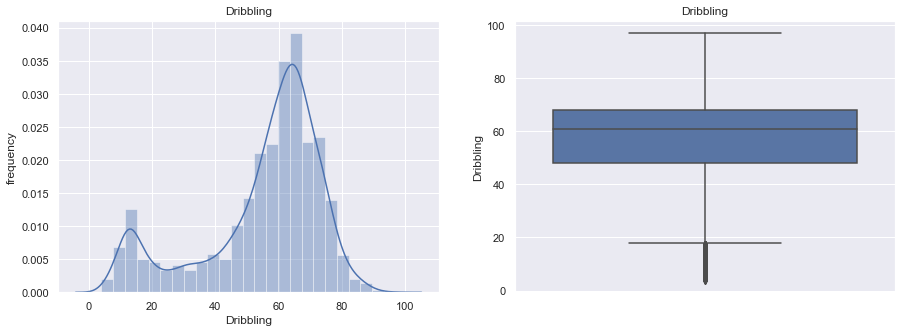

skewness for Curve is :  -0.22917200183511482
kurtosis for Curve is :  -0.7526742699547309


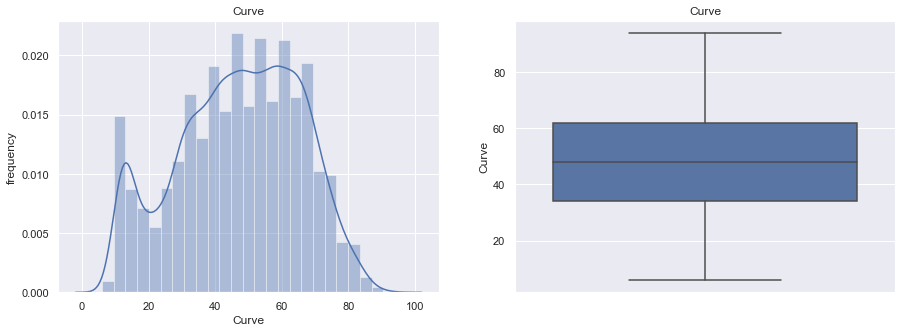

skewness for FKAccuracy is :  0.10692323264164297
kurtosis for FKAccuracy is :  -0.725120719972959


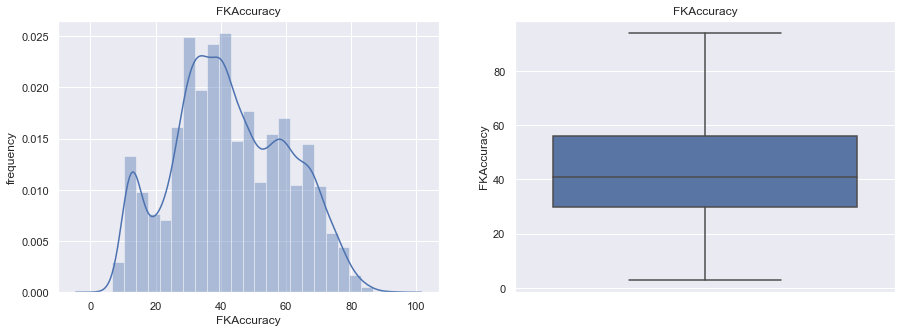

skewness for LongPassing is :  -0.591088020936485
kurtosis for LongPassing is :  -0.38158647589289574


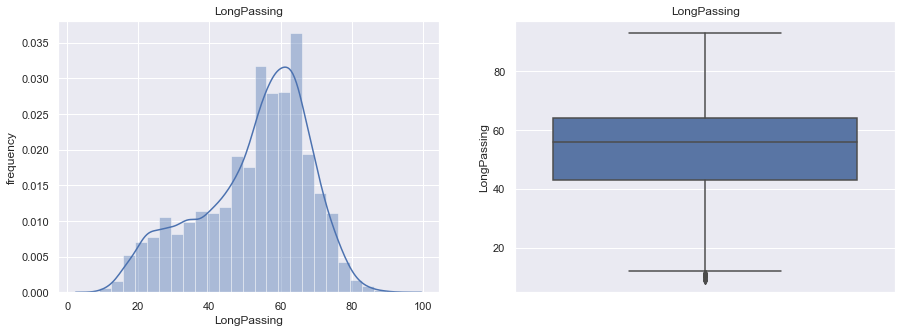

skewness for BallControl is :  -1.24771951784994
kurtosis for BallControl is :  0.9667493220733099


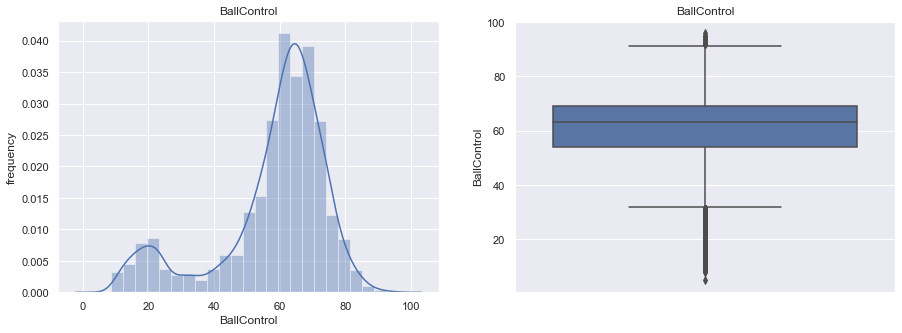

skewness for Acceleration is :  -0.8094956213387197
kurtosis for Acceleration is :  0.44346056908419307


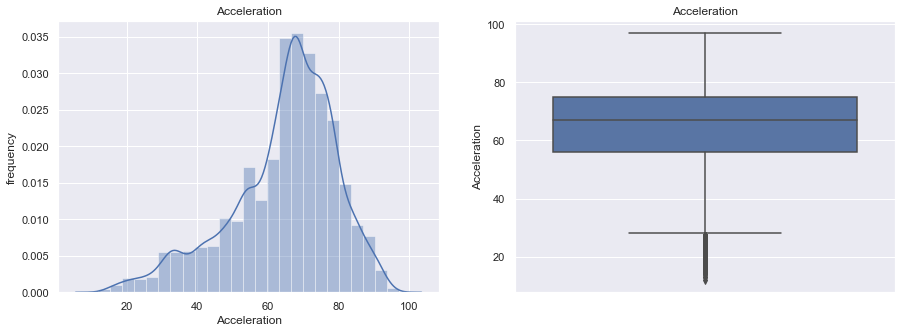

skewness for SprintSpeed is :  -0.821405480057497
kurtosis for SprintSpeed is :  0.5060376065526091


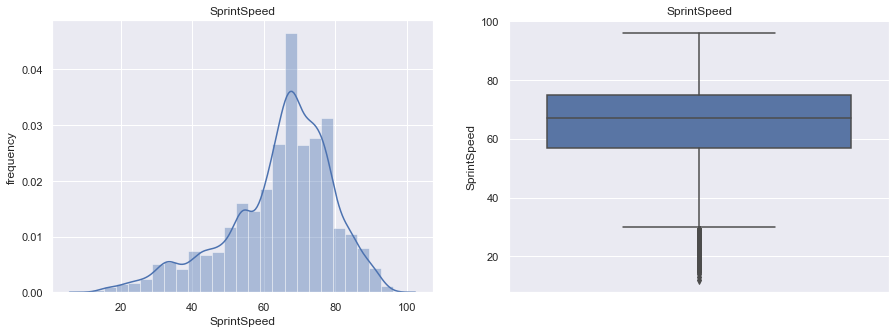

skewness for Agility is :  -0.5916196768184859
kurtosis for Agility is :  -0.0837994676992726


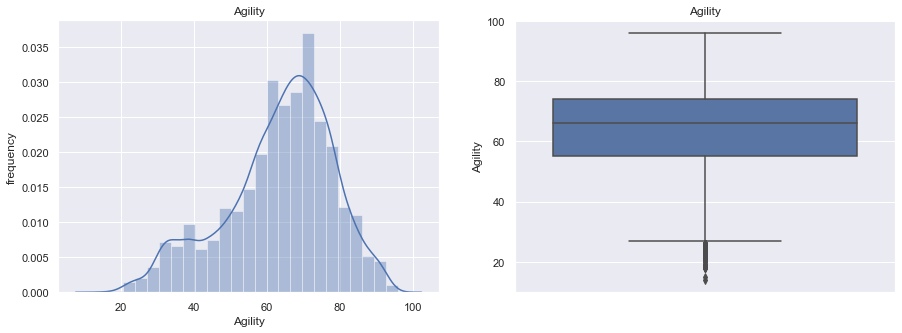

skewness for Reactions is :  -0.1051244780388915
kurtosis for Reactions is :  0.05160290971996684


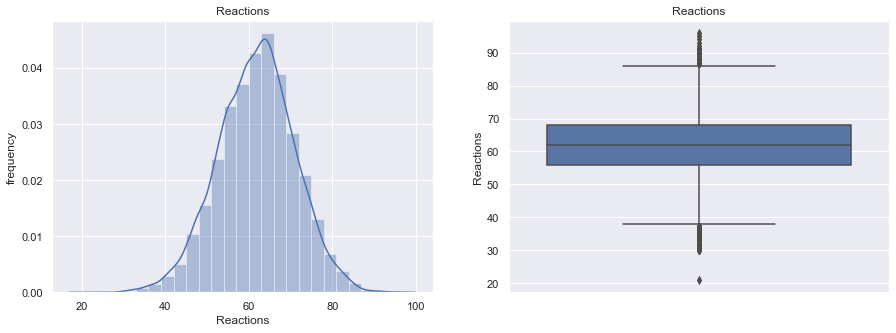

skewness for Balance is :  -0.5775953510011431
kurtosis for Balance is :  0.07068945623295386


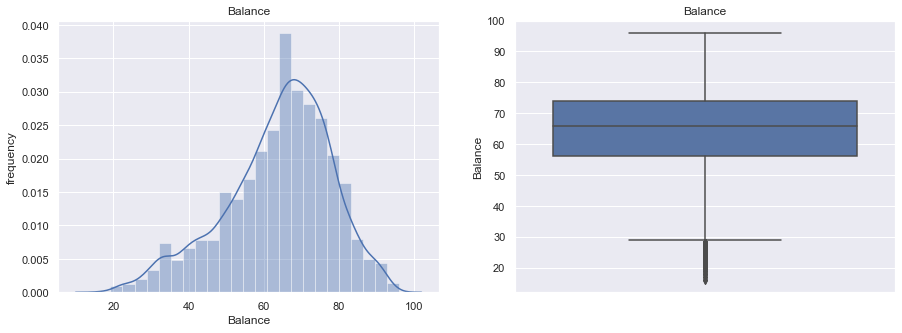

skewness for ShotPower is :  -0.6633040089090644
kurtosis for ShotPower is :  -0.36550486413918515


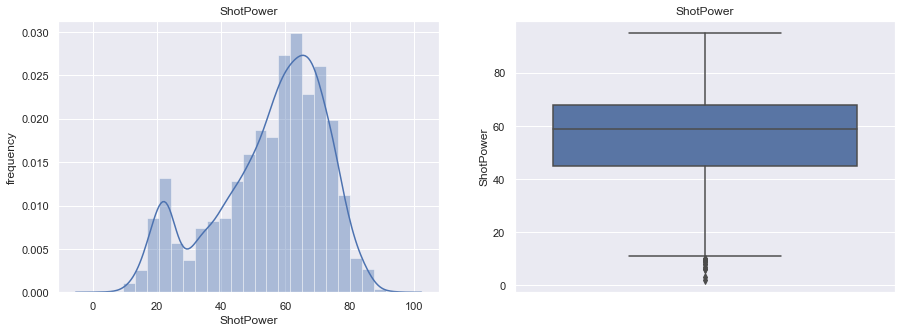

skewness for Jumping is :  -0.45822835096521575
kurtosis for Jumping is :  0.32268760602271485


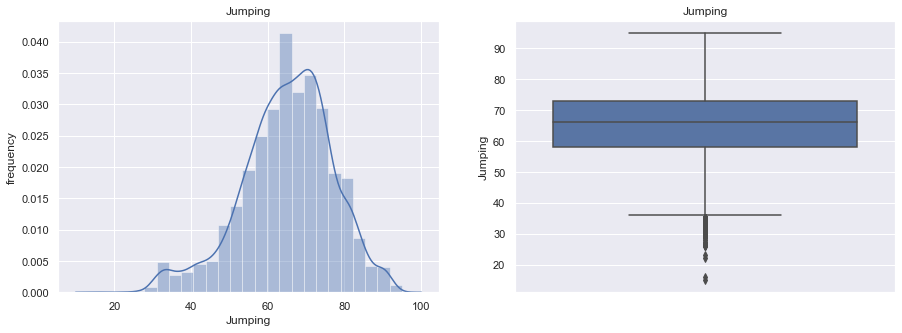

skewness for Stamina is :  -0.9058056082472926
kurtosis for Stamina is :  0.4284858107368361


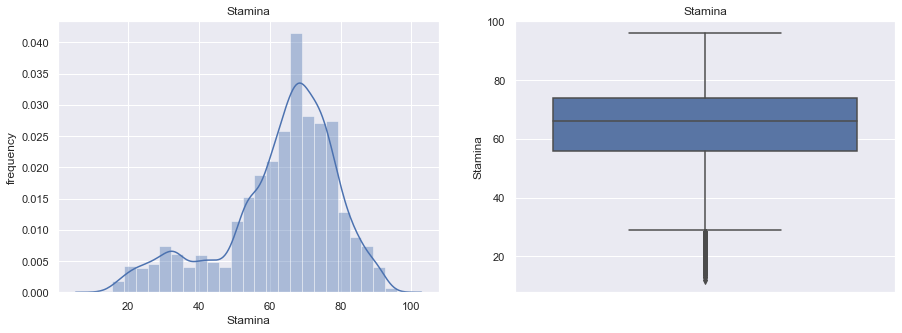

skewness for Strength is :  -0.4668370586229843
kurtosis for Strength is :  0.05161687626490563


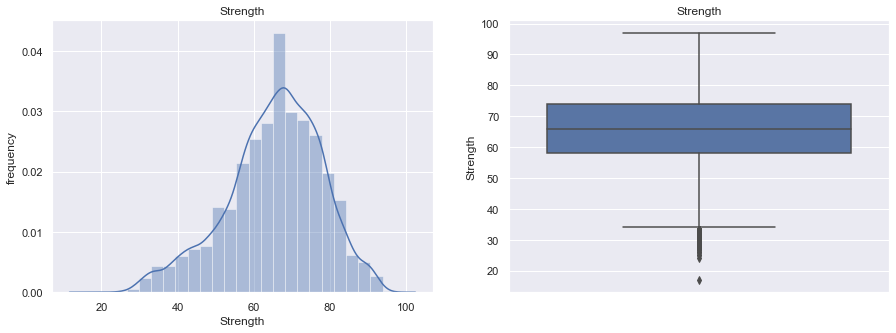

skewness for LongShots is :  -0.4153432107988793
kurtosis for LongShots is :  -0.8372083682993052


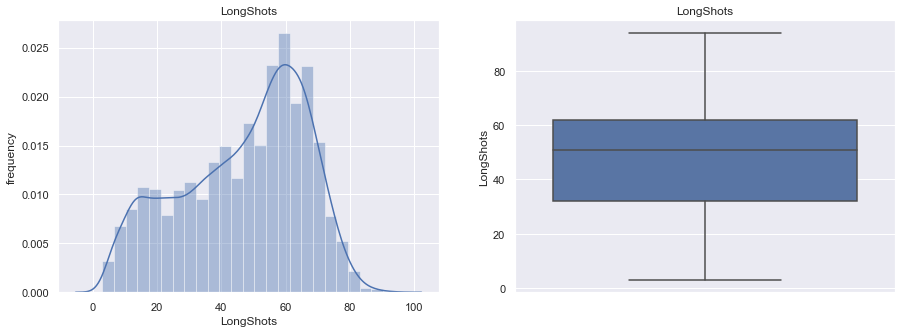

skewness for Aggression is :  -0.4399481987902463
kurtosis for Aggression is :  -0.6217941507248774


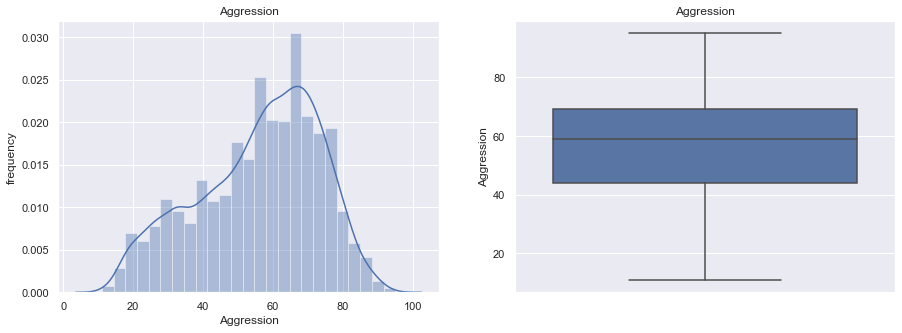

skewness for Interceptions is :  -0.2751945039564909
kurtosis for Interceptions is :  -1.2529506016864898


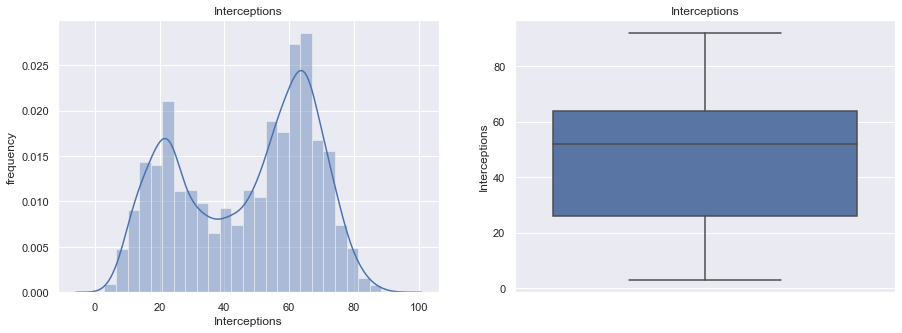

skewness for Positioning is :  -0.7041787087503831
kurtosis for Positioning is :  -0.4272659382378601


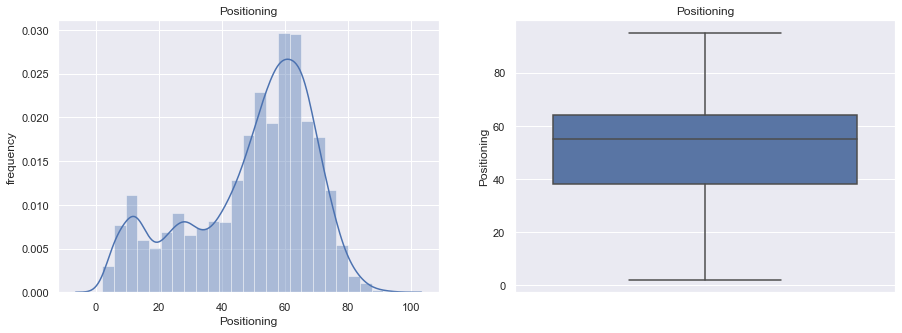

skewness for Vision is :  -0.3316057361329239
kurtosis for Vision is :  -0.36401920860840287


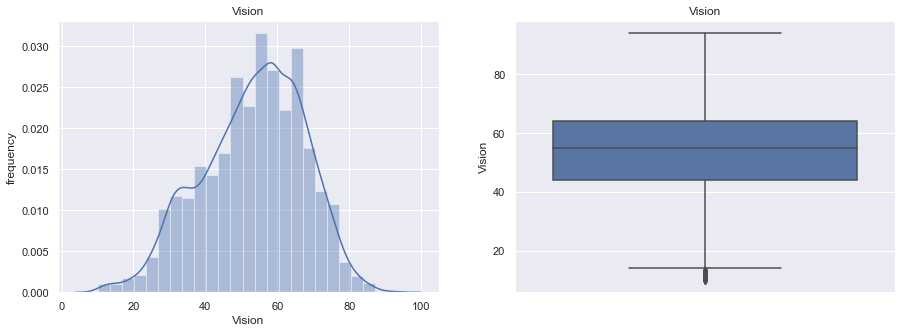

skewness for Penalties is :  -0.34356550216881765
kurtosis for Penalties is :  -0.3573261063926192


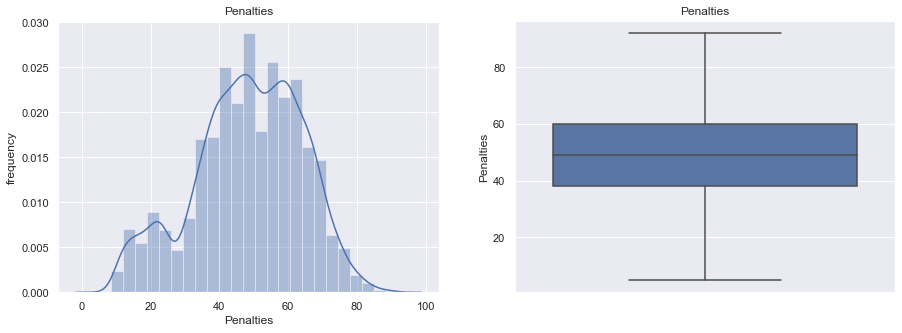

skewness for Composure is :  -0.3664741741505178
kurtosis for Composure is :  0.18052840821701022


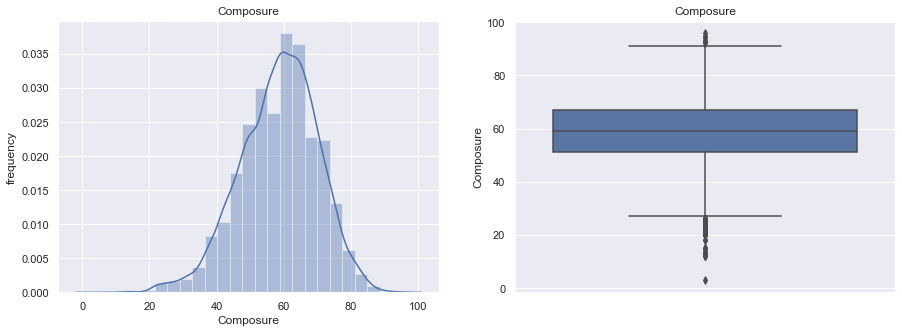

skewness for Marking is :  -0.36764811674226755
kurtosis for Marking is :  -1.082045927265671


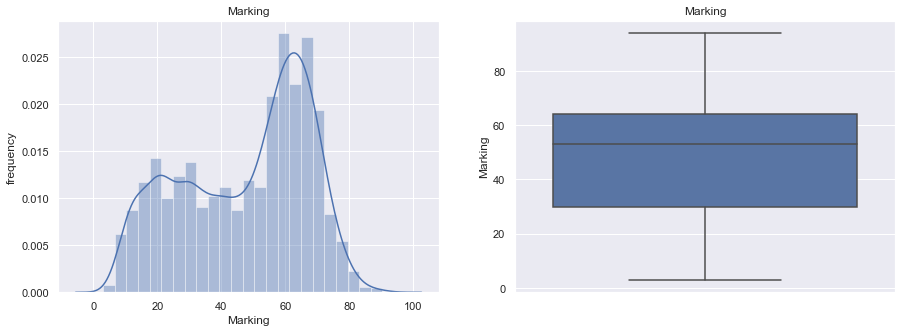

skewness for StandingTackle is :  -0.3459116999820049
kurtosis for StandingTackle is :  -1.3006883260219362


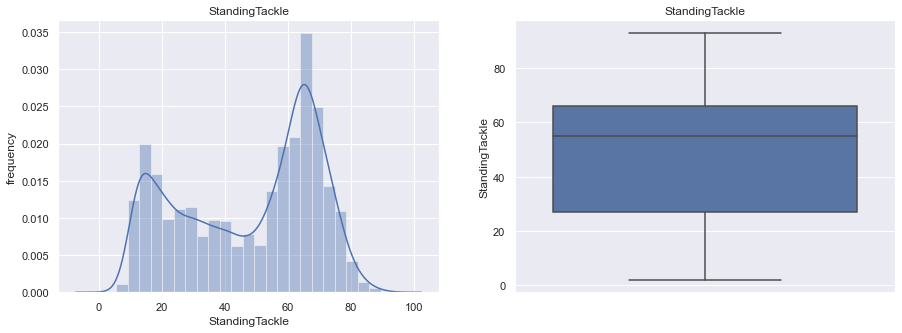

skewness for SlidingTackle is :  -0.2747789260775261
kurtosis for SlidingTackle is :  -1.3513466751084644


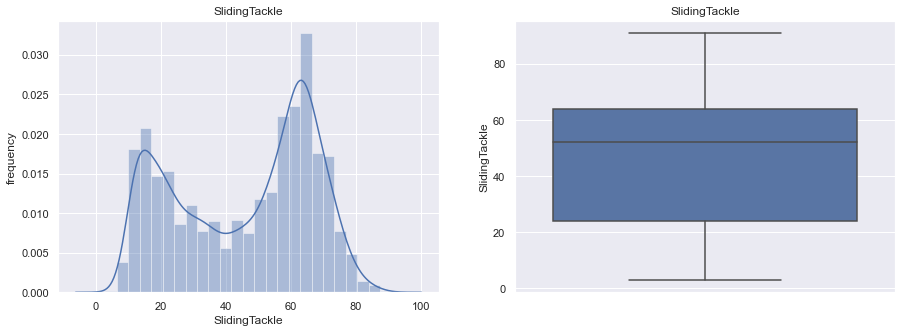

skewness for GKDiving is :  2.4045712409919178
kurtosis for GKDiving is :  4.261801287522408


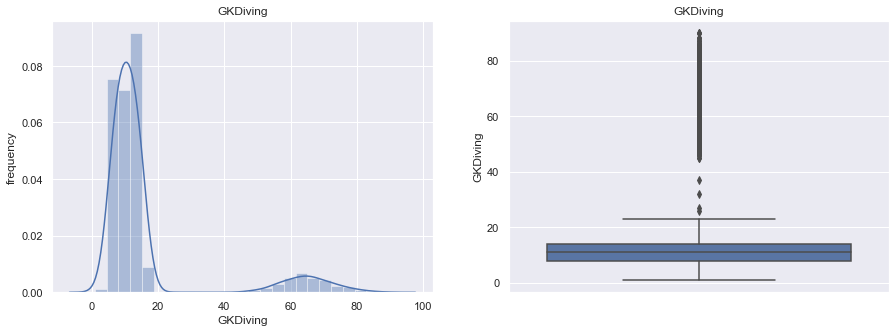

skewness for GKHandling is :  2.3967001429233896
kurtosis for GKHandling is :  4.256285313269617


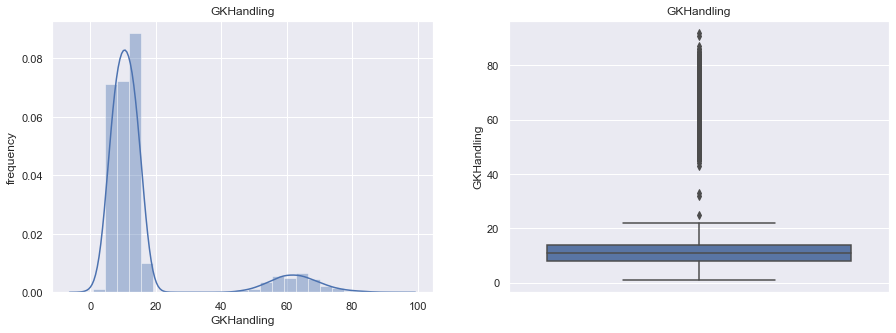

skewness for GKKicking is :  2.3948724807829076
kurtosis for GKKicking is :  4.281558236563226


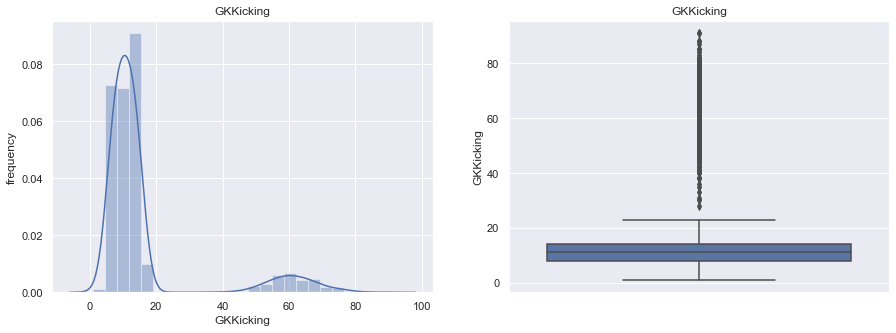

skewness for GKPositioning is :  2.4298917336805377
kurtosis for GKPositioning is :  4.46228338513024


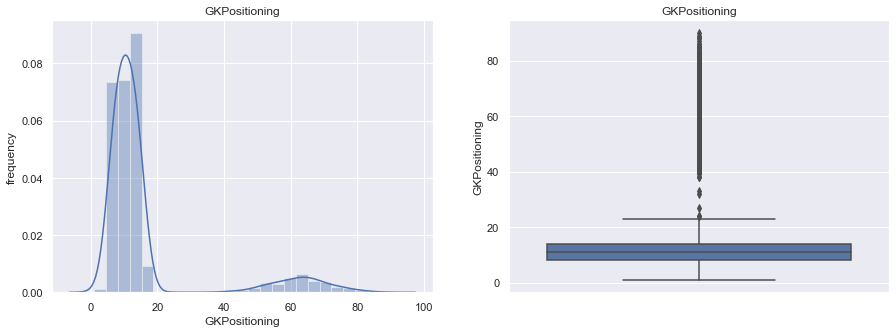

skewness for GKReflexes is :  2.4159407456692086
kurtosis for GKReflexes is :  4.325066910138679


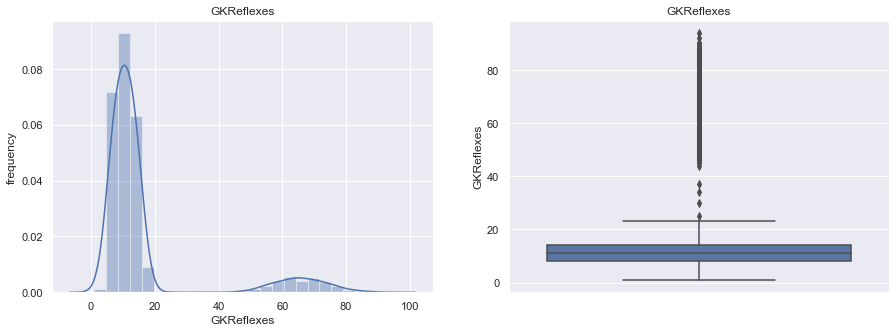

skewness for Release_Clause is :  7.109883679052365
kurtosis for Release_Clause is :  77.14629619358416


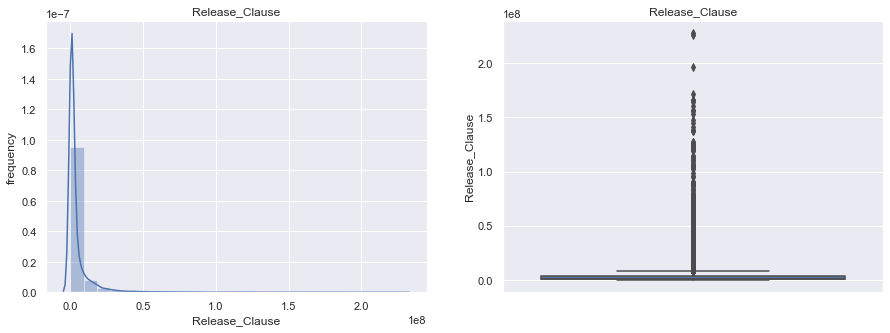

skewness for Release_Clause_Class is :  -0.200135089571233
kurtosis for Release_Clause_Class is :  -1.960181516637769


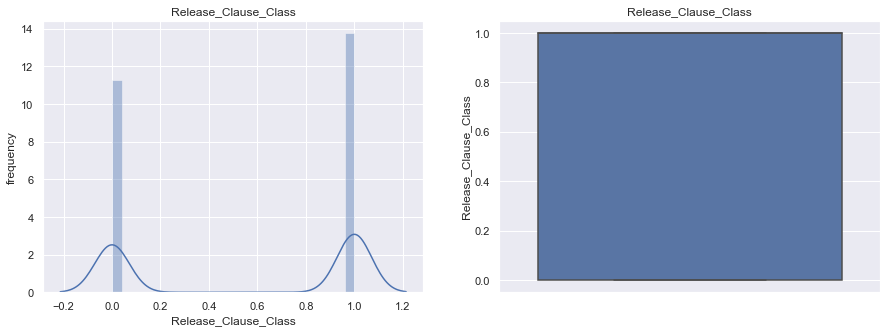

In [115]:
# for numeric columns
for cols in num:
    fig,axes = plt.subplots(1,2, figsize = (15,5))
    print("skewness for" , cols , "is : ", data[cols].skew())
    print("kurtosis for" , cols , "is : ", data[cols].kurtosis())
    sns.distplot(data[cols], bins = 25, ax = axes[0]).set(title = cols , ylabel = 'frequency')
    sns.boxplot(y = data[cols], ax = axes[1])
    plt.title(cols)
    plt.show()

In [116]:
data=data.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
                 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],axis=1)
data=pd.get_dummies(data,drop_first=True)
data.rename(columns = {'Release_Clause':'Release Clause', 
                       'International_Reputation':'International Reputation',
                      'Preferred_Foot':'Preferred Foot','Work_Rate':'Work Rate','Body_Type':'Body Type',
                      'Real_Face':'Real Face'}, inplace = True)
data.rename(columns = {'Skill_Moves':'Skill Moves', 
                       'Jersey_Number':'Jersey Number',"Weak_Foot":"Weak Foot"}, inplace = True)
import statsmodels.api as sm
X=data.drop("Release Clause",axis=1)
y=data["Release Clause"]

In [117]:
#Adding constant column of ones, mandatory for sm.OLS model
X_constant = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:22:22   Log-Likelihood:            -2.5536e+05
No. Observations:               16643   AIC:                         5.109e+05
Df Residuals:                   16545   BIC:                         5.117e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -5.201e+06   8.89e+06     -0.585      0.559   -2.26e+07    1.22e+07
ID                               -0.0831      0.466     -0.178      0.859      -0.997       0.831
Age                            1.301e+04   4959.777      2.622      0.009    3285.065    2.27e+04
Overall                       -4.246e+04   5585.682     -7.602      0.000   -5.34e+04   -3.15e+04
Potential                      3.633e+04   3628.376     10.014      0.000    2.92e+04    4.34e+04
Value                             1.9596      0.004    532.978      0.000       1.952       1.967
Wage                              2.4113      0.848      2.842      0.004       0.748       4.074
Special                        1095.8467   5051.299      0.217      0.828   -8805.241     1.1e+04
International Reputation      -6.919e+05   3.33e+04    -20.760      0.000   -7.57e+05   -6.27e+05
Weak Foot                     -1.554e+04   1.45e+04     -1.072      0.284   -4.39e+04    1.29e+04
Skill Moves                    3.279e+04   2.41e+04      1.363      0.173   -1.44e+04    7.99e+04
Jersey Number                   446.9301    574.130      0.778      0.436    -678.427    1572.287
Joined                         2429.8789   4365.461      0.557      0.578   -6126.894     1.1e+04
Height                         1.504e+05   9.42e+04      1.597      0.110   -3.42e+04    3.35e+05
Weight                        -1801.5865   1204.152     -1.496      0.135   -4161.853     558.680
Crossing                       1787.2234   5223.807      0.342      0.732   -8451.999     1.2e+04
Finishing                      6449.7258   5269.061      1.224      0.221   -3878.199    1.68e+04
HeadingAccuracy                 130.9172   5215.502      0.025      0.980   -1.01e+04    1.04e+04
ShortPassing                   4087.7899   5487.287      0.745      0.456   -6667.881    1.48e+04
Volleys                       -7880.6693   5209.614     -1.513      0.130   -1.81e+04    2330.734
Dribbling                     -1512.9219   5408.071     -0.280      0.780   -1.21e+04    9087.478
Curve                          1339.0664   5208.602      0.257      0.797   -8870.353    1.15e+04
FKAccuracy                    -3209.9265   5185.384     -0.619      0.536   -1.34e+04    6953.982
LongPassing                   -4386.4750   5295.865     -0.828      0.408   -1.48e+04    5993.989
BallControl                     362.3062   5560.860      0.065      0.948   -1.05e+04    1.13e+04
Acceleration                  -1799.5142   5347.082     -0.337      0.736   -1.23e+04    8681.340
SprintSpeed                    -979.7666   5290.747     -0.185      0.853   -1.14e+04    9390.666
Agility                       -3468.8236   5231.747     -0.663      0.507   -1.37e+04    6785.962
Reactions                     -1260.4322   53

In [118]:
data.shape

(16643, 98)

FEATURE SELECTION

In [119]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const                 5.586486e-01
ID                    8.585810e-01
Age                   8.738043e-03
Overall               3.077665e-14
Potential             1.547844e-23
                          ...     
Position_RWB          4.906341e-01
Position_ST           2.554567e-01
height_group_tall     2.984853e-01
weight_group_over     4.827601e-03
weight_group_under    5.788287e-01
Length: 98, dtype: float64

In [120]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'LongPassing', 'Stamina', 'Vision', 'Marking', 'StandingTackle', 'GKHandling', 'Body_Type_C. Ronaldo', 'Body_Type_Courtois', 'Body_Type_Messi', 'Real_Face_Yes', 'Position_CDM', 'Position_GK', 'Position_LF', 'Position_LS', 'Position_RAM', 'Position_RF', 'weight_group_over']


In [121]:
len((selected_features_BE))

27

In [122]:
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split

In [123]:
df=data[["Release Clause",'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'LongPassing', 'Stamina', 'Vision', 'Marking', 'StandingTackle', 'GKHandling', 'Body_Type_C. Ronaldo', 'Body_Type_Courtois', 'Body_Type_Messi', 'Real_Face_Yes', 'Position_CDM', 'Position_GK', 'Position_LF', 'Position_LS', 'Position_RAM', 'Position_RF', 'weight_group_over']]

In [124]:
X=df.drop("Release Clause",axis=1)
y=df["Release Clause"]

In [125]:
#Adding constant column of ones, mandatory for sm.OLS model
X_constant = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.030e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:22:26   Log-Likelihood:            -2.5540e+05
No. Observations:               16643   AIC:                         5.108e+05
Df Residuals:                   16615   BIC:                         5.111e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.664e+05   1.72e+05      2.709      0.007    1.29e+05    8.04e+05
Age                        1.38e+04   3979.209      3.468      0.001    5999.532    2.16e+04
Overall                  -4.219e+04   3935.752    -10.720      0.000   -4.99e+04   -3.45e+04
Potential                 3.618e+04   3484.826     10.381      0.000    2.93e+04     4.3e+04
Value                        1.9598      0.003    572.504      0.000       1.953       1.967
Wage                         2.4106      0.837      2.881      0.004       0.770       4.051
International Reputation -6.905e+05   3.25e+04    -21.215      0.000   -7.54e+05   -6.27e+05
Crossing                  3316.9424    923.858      3.590      0.000    1506.082    5127.803
Finishing                 6892.8765   1208.988      5.701      0.000    4523.130    9262.623
ShortPassing              4598.1326   1978.453      2.324      0.020     720.154    8476.111
Volleys                  -6976.9503   1157.245     -6.029      0.000   -9245.274   -4708.626
LongPassing              -3661.1356   1489.028     -2.459      0.014   -6579.790    -742.482
Stamina                  -6818.3131    969.916     -7.030      0.000   -8719.452   -4917.175
Vision                   -2978.1826   1172.147     -2.541      0.011   -5275.717    -680.649
Marking                  -2769.0323   1108.637     -2.498      0.013   -4942.078    -595.986
StandingTackle            5797.5939   1088.344      5.327      0.000    3664.324    7930.864
GKHandling                9518.4253   2407.542      3.954      0.000    4799.385    1.42e+04
Body_Type_C. Ronaldo     -2.184e+07   1.13e+06    -19.249      0.000   -2.41e+07   -1.96e+07
Body_Type_Courtois        1.036e+07   1.13e+06      9.194      0.000    8.15e+06    1.26e+07
Body_Type_Messi           1.321e+07    1.2e+06     11.035      0.000    1.09e+07    1.56e+07
Real_Face_Yes             3.777e+05   3.65e+04     10.348      0.000    3.06e+05    4.49e+05
Position_CDM              9.677e+04   4.09e+04      2.364      0.018    1.65e+04    1.77e+05
Position_GK              -4.247e+05   1.33e+05     -3.187      0.001   -6.86e+05   -1.63e+05
Position_LF              -2.765e+06    2.9e+05     -9.519      0.000   -3.33e+06    -2.2e+06
Position_LS               -2.29e+05   8.46e+04     -2.706      0.007   -3.95e+05   -6.31e+04
Position_RAM             -1.139e+06   2.45e+05     -4.643      0.000   -1.62e+06   -6.58e+05
Position_RF              -1.714e+06   3.23e+05     -5.298      0.000   -2.35e+06   -1.08e+06
weight_group_over        -2.114e+05   6.35e+04     -3.330      0.001   -3.36e+05    -8.7e+04
==============================================================================
Omnibus:                     6380.743   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Ja

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["factor"]=[variance_inflation_factor(X_constant.values,i) for i in range (X_constant.shape[1])]
vif["features"]=X_constant.columns
vif

factor                  features
0   394.483982                     const
1     4.685931                       Age
2    10.120906                   Overall
3     6.113049                 Potential
4     5.101512                     Value
5     4.617565                      Wage
6     2.238477  International Reputation
7     3.866488                  Crossing
8     7.423025                 Finishing
9    11.422243              ShortPassing
10    5.607154                   Volleys
11    6.988180               LongPassing
12    3.229543                   Stamina
13    3.670714                    Vision
14    6.499113                   Marking
15    7.407469            StandingTackle
16   22.372930                GKHandling
17    1.028475      Body_Type_C. Ronaldo
18    1.014689        Body_Type_Courtois
19    1.144733           Body_Type_Messi
20    1.459145             Real_Face_Yes
21    1.107730              Position_CDM
22   23.897547               Position_GK
23    1.010669               Position_LF
24    1.041567               Position_LS
25    1.009110              Position_RAM
26    1.086007               Position_RF
27    1.057891         weight_group_over

In [127]:
#MODEL 1 - SIMPLE LINEAR REGRESSION

In [128]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('R-squared on train data :',r2_score(y_train, y_pred_train))
print('R-squared on test data :',r2_score(y_test, y_pred_test))

print('\nRMSE on train data :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on test data :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared on train data : 0.9901742271819832
R-squared on test data : 0.9887766278808289

RMSE on train data : 1094986.677280849
RMSE on test data : 1195383.387125873


In [129]:
Coefficients = pd.DataFrame({'Features':X.columns, 'Coefficient':lr.coef_})
Coefficients

Features   Coefficient
0                        Age  1.597535e+04
1                    Overall -4.338150e+04
2                  Potential  3.624759e+04
3                      Value  1.967426e+00
4                       Wage  1.613862e+00
5   International Reputation -7.280892e+05
6                   Crossing  2.973803e+03
7                  Finishing  6.320073e+03
8               ShortPassing  4.343190e+03
9                    Volleys -6.563284e+03
10               LongPassing -3.740367e+03
11                   Stamina -7.180118e+03
12                    Vision -2.883650e+03
13                   Marking -4.289760e+03
14            StandingTackle  7.157875e+03
15                GKHandling  9.900991e+03
16      Body_Type_C. Ronaldo -2.190050e+07
17        Body_Type_Courtois  2.328306e-08
18           Body_Type_Messi -3.725290e-09
19             Real_Face_Yes  3.764197e+05
20              Position_CDM  9.993918e+04
21               Position_GK -4.706803e+05
22               Position_LF -1.702166e+06
23               Position_LS -2.189129e+05
24              Position_RAM -6.739480e+05
25               Position_RF -1.948272e+06
26         weight_group_over -2.492186e+05

In [130]:
Coefficients.sort_values(by="Coefficient",ascending=False)

Features   Coefficient
19             Real_Face_Yes  3.764197e+05
20              Position_CDM  9.993918e+04
2                  Potential  3.624759e+04
0                        Age  1.597535e+04
15                GKHandling  9.900991e+03
14            StandingTackle  7.157875e+03
7                  Finishing  6.320073e+03
8               ShortPassing  4.343190e+03
6                   Crossing  2.973803e+03
3                      Value  1.967426e+00
4                       Wage  1.613862e+00
17        Body_Type_Courtois  2.328306e-08
18           Body_Type_Messi -3.725290e-09
12                    Vision -2.883650e+03
10               LongPassing -3.740367e+03
13                   Marking -4.289760e+03
9                    Volleys -6.563284e+03
11                   Stamina -7.180118e+03
1                    Overall -4.338150e+04
23               Position_LS -2.189129e+05
26         weight_group_over -2.492186e+05
21               Position_GK -4.706803e+05
24              Position_RAM -6.739480e+05
5   International Reputation -7.280892e+05
22               Position_LF -1.702166e+06
25               Position_RF -1.948272e+06
16      Body_Type_C. Ronaldo -2.190050e+07

In [131]:
# MODEL 2 Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('R-squared on train data :',r2_score(y_train, y_pred_train))
print('R-squared on test data :',r2_score(y_test, y_pred_test))

print('\nRMSE on train data :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on test data :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared on train data : 0.9980137020500968
R-squared on test data : 0.9872857597977909

RMSE on train data : 492320.2200635701
RMSE on test data : 1272303.5550455693


In [132]:
mse=np.mean((y_pred_test-y_test)**2)
rmse=np.sqrt(mse)
print("root_mean_squared_error :", rmse)
mae=(abs(y_pred_test-y_test)).mean()
print("mean_absolute_error :", mae)

root_mean_squared_error : 1272303.5550455693
mean_absolute_error : 435422.741838574


In [133]:
ypred=pd.DataFrame(y_pred_test,columns=["predicted"])
ytest=pd.DataFrame(y_test)
ytest=ytest.reset_index(drop=True)
new=pd.concat([ytest,ypred],axis=1)
new

Release Clause   predicted
0          8500000.0   9378000.0
1         11500000.0   9418000.0
2          2300000.0   2670000.0
3          1400000.0   1695000.0
4           998000.0   1014900.0
...              ...         ...
4988      10200000.0  11188000.0
4989        522000.0    443090.0
4990        165000.0    148010.0
4991        979000.0   1155100.0
4992      20800000.0  20046000.0

[4993 rows x 2 columns]

In [134]:
# MODEL 3 Decision Tree

#决策树用于拟合带有噪声观察的正弦曲线
lr=DecisionTreeRegressor()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('R-squared on train data :',r2_score(y_train, y_pred_train))
print('R-squared on test data :',r2_score(y_test, y_pred_test))

print('\nRMSE on train data :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on test data :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared on train data : 1.0
R-squared on test data : 0.9827141181642447

RMSE on train data : 0.0
RMSE on test data : 1483512.8231380344


In [135]:
# MODEL 4 Cat Boost Regressor
from catboost import CatBoostRegressor
lr=CatBoostRegressor()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Learning rate set to 0.060347
0:	learn: 10488066.8373636	total: 56.3ms	remaining: 56.2s
1:	learn: 9978720.4772153	total: 58ms	remaining: 28.9s
2:	learn: 9475828.2125520	total: 59.6ms	remaining: 19.8s
3:	learn: 9006619.0458813	total: 61.3ms	remaining: 15.3s
4:	learn: 8581137.3867293	total: 62.9ms	remaining: 12.5s
5:	learn: 8152730.5626454	total: 64.9ms	remaining: 10.7s
6:	learn: 7750216.2788976	total: 66.5ms	remaining: 9.44s
7:	learn: 7392713.6418500	total: 68.3ms	remaining: 8.47s
8:	learn: 7026244.8229838	total: 69.9ms	remaining: 7.7s
9:	learn: 6668058.6023341	total: 71.5ms	remaining: 7.08s
10:	learn: 6359509.9011004	total: 73.4ms	remaining: 6.6s
11:	learn: 6057124.2304189	total: 74.9ms	remaining: 6.16s
12:	learn: 5764820.2012091	total: 76.4ms	remaining: 5.8s
13:	learn: 5484049.2831049	total: 78.2ms	remaining: 5.51s
14:	learn: 5223620.4277393	total: 80ms	remaining: 5.25s
15:	learn: 4998928.0121972	total: 81.7ms	remaining: 5.02s
16:	learn: 4764210.7966173	total: 84.3ms	remaining: 4.87s


194:	learn: 854915.0599762	total: 373ms	remaining: 1.54s
195:	learn: 853535.4439953	total: 375ms	remaining: 1.54s
196:	learn: 853370.0818826	total: 377ms	remaining: 1.53s
197:	learn: 851963.0294312	total: 378ms	remaining: 1.53s
198:	learn: 850534.7280617	total: 380ms	remaining: 1.53s
199:	learn: 849097.1990629	total: 381ms	remaining: 1.52s
200:	learn: 847245.0180589	total: 383ms	remaining: 1.52s
201:	learn: 847096.8817983	total: 384ms	remaining: 1.52s
202:	learn: 846953.1574858	total: 386ms	remaining: 1.51s
203:	learn: 845311.1013253	total: 388ms	remaining: 1.51s
204:	learn: 845173.0697492	total: 389ms	remaining: 1.51s
205:	learn: 843505.2169516	total: 391ms	remaining: 1.51s
206:	learn: 841831.4805193	total: 393ms	remaining: 1.5s
207:	learn: 841740.5816122	total: 394ms	remaining: 1.5s
208:	learn: 841652.3956034	total: 396ms	remaining: 1.5s
209:	learn: 841566.8417767	total: 397ms	remaining: 1.49s
210:	learn: 840890.4131182	total: 399ms	remaining: 1.49s
211:	learn: 838860.2908791	total: 

431:	learn: 625773.1156814	total: 747ms	remaining: 983ms
432:	learn: 624626.6303895	total: 749ms	remaining: 981ms
433:	learn: 624312.7046084	total: 751ms	remaining: 979ms
434:	learn: 623569.3175845	total: 753ms	remaining: 978ms
435:	learn: 622702.1606473	total: 755ms	remaining: 976ms
436:	learn: 622025.7805790	total: 756ms	remaining: 974ms
437:	learn: 620966.2531945	total: 758ms	remaining: 972ms
438:	learn: 620511.5227595	total: 759ms	remaining: 970ms
439:	learn: 620124.0270699	total: 761ms	remaining: 968ms
440:	learn: 619510.2676979	total: 762ms	remaining: 966ms
441:	learn: 618822.2365682	total: 764ms	remaining: 964ms
442:	learn: 618095.3479991	total: 766ms	remaining: 963ms
443:	learn: 617781.4109950	total: 768ms	remaining: 962ms
444:	learn: 617167.6567402	total: 770ms	remaining: 960ms
445:	learn: 616220.3379265	total: 772ms	remaining: 959ms
446:	learn: 616019.8949231	total: 774ms	remaining: 957ms
447:	learn: 615705.8206404	total: 775ms	remaining: 955ms
448:	learn: 614879.2992671	tota

636:	learn: 524161.7686953	total: 1.12s	remaining: 639ms
637:	learn: 523374.3524131	total: 1.12s	remaining: 638ms
638:	learn: 523184.3122856	total: 1.13s	remaining: 636ms
639:	learn: 522685.8117707	total: 1.13s	remaining: 634ms
640:	learn: 522437.8146248	total: 1.13s	remaining: 632ms
641:	learn: 522213.7583054	total: 1.13s	remaining: 630ms
642:	learn: 521666.9028696	total: 1.13s	remaining: 629ms
643:	learn: 521491.3470049	total: 1.13s	remaining: 627ms
644:	learn: 521215.8150371	total: 1.14s	remaining: 625ms
645:	learn: 520936.8784805	total: 1.14s	remaining: 623ms
646:	learn: 520430.4868972	total: 1.14s	remaining: 622ms
647:	learn: 520139.0240205	total: 1.14s	remaining: 620ms
648:	learn: 519775.8762090	total: 1.14s	remaining: 618ms
649:	learn: 519348.8114774	total: 1.15s	remaining: 617ms
650:	learn: 519050.3693759	total: 1.15s	remaining: 615ms
651:	learn: 518737.8282534	total: 1.15s	remaining: 613ms
652:	learn: 518521.0134997	total: 1.15s	remaining: 612ms
653:	learn: 518150.6328760	tota

863:	learn: 449644.7781371	total: 1.5s	remaining: 236ms
864:	learn: 449265.8471640	total: 1.5s	remaining: 234ms
865:	learn: 449138.6088422	total: 1.5s	remaining: 233ms
866:	learn: 448897.2828697	total: 1.5s	remaining: 231ms
867:	learn: 448253.5302338	total: 1.51s	remaining: 229ms
868:	learn: 447833.0442902	total: 1.51s	remaining: 228ms
869:	learn: 447491.1420635	total: 1.51s	remaining: 226ms
870:	learn: 447134.1920003	total: 1.51s	remaining: 224ms
871:	learn: 446838.1400040	total: 1.52s	remaining: 223ms
872:	learn: 446650.9687321	total: 1.52s	remaining: 221ms
873:	learn: 446407.7123459	total: 1.52s	remaining: 219ms
874:	learn: 446252.6698551	total: 1.52s	remaining: 218ms
875:	learn: 446024.6656652	total: 1.52s	remaining: 216ms
876:	learn: 445933.7618302	total: 1.53s	remaining: 214ms
877:	learn: 445664.0064681	total: 1.53s	remaining: 212ms
878:	learn: 445476.6330796	total: 1.53s	remaining: 211ms
879:	learn: 445172.7699897	total: 1.53s	remaining: 209ms
880:	learn: 444985.7072165	total: 1

In [136]:
from sklearn.metrics import r2_score,mean_squared_error
print('R-squared on train data :',r2_score(y_train, y_pred_train))
print('R-squared on test data :',r2_score(y_test, y_pred_test))

print('\nRMSE on train data :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on test data :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared on train data : 0.9985854521040535
R-squared on test data : 0.9860854898443139

RMSE on train data : 415464.86699676275
RMSE on test data : 1331004.4139728015


In [137]:
mse=np.mean((y_pred_test-y_test)**2)
rmse=np.sqrt(mse)
print("root_mean_squared_error :", rmse)
mae=(abs(y_pred_test-y_test)).mean()
print("mean_absolute_error :", mae)
mape=(abs(y_test-y_pred_test)/y_pred_test).mean()
print("mean_absolute_percentage_error :",mape)

root_mean_squared_error : 1331004.413972802
mean_absolute_error : 415131.58686873293
mean_absolute_percentage_error : 0.13107357468387298


In [138]:
ypred=pd.DataFrame(y_pred_test,columns=["predicted"])
ytest=pd.DataFrame(y_test)
ytest=ytest.reset_index(drop=True)
new=pd.concat([ytest,ypred],axis=1)

In [139]:
new["actual_predicted"]=new["predicted"].apply(lambda x: "%.7f" % x)
new["actual_predicted"]=new["actual_predicted"].astype(float)
new=new.drop(["predicted"],axis=1)
new["actual_predicted"]=new["actual_predicted"].apply(np.ceil)
new

Release Clause  actual_predicted
0          8500000.0         9419283.0
1         11500000.0        10069783.0
2          2300000.0         2488346.0
3          1400000.0         1751202.0
4           998000.0          969406.0
...              ...               ...
4988      10200000.0        10695750.0
4989        522000.0          557240.0
4990        165000.0          177182.0
4991        979000.0          956979.0
4992      20800000.0        19630659.0

[4993 rows x 2 columns]

REGULARISATION

In [140]:
model_cols=['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'LongPassing', 'Stamina', 'Vision', 'Marking', 'StandingTackle', 'GKHandling', 'Body_Type_C. Ronaldo', 'Body_Type_Courtois', 'Body_Type_Messi', 'Real_Face_Yes', 'Position_CDM', 'Position_GK', 'Position_LF', 'Position_LS', 'Position_RAM', 'Position_RF', 'weight_group_over']
multi_x=np.column_stack(tuple(df[col] for col in model_cols))
y=df["Release Clause"]

In [141]:
multi_train_x,multi_test_x,multi_train_y,multi_test_y=train_test_split(multi_x,y,test_size=0.3)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
import sklearn.metrics
multi_model=linear_model.LinearRegression()
multi_model.fit(multi_train_x,multi_train_y)
multi_model_intercept=multi_model.intercept_
multi_coefficient=dict(zip(model_cols,multi_model.coef_))

In [142]:
multi_model_intercept

733722.3940899568

In [143]:
multi_coefficient

{'Age': 14976.172397755767,
 'Overall': -42583.92784264459,
 'Potential': 34283.23541728564,
 'Value': 1.9748114573012572,
 'Wage': 1.85797218691539,
 'International Reputation': -770226.5824832785,
 'Crossing': 3739.8020137839135,
 'Finishing': 7786.308980215966,
 'ShortPassing': 3359.129594245497,
 'Volleys': -8560.178402658714,
 'LongPassing': -4005.48036774599,
 'Stamina': -7168.159601544103,
 'Vision': -1499.9872599295124,
 'Marking': -2966.9241259027817,
 'StandingTackle': 5882.758555169945,
 'GKHandling': 7474.662060547948,
 'Body_Type_C. Ronaldo': -22384854.269877747,
 'Body_Type_Courtois': 9961899.266395718,
 'Body_Type_Messi': 13125064.388448808,
 'Real_Face_Yes': 382650.9165839134,
 'Position_CDM': 141454.9857702136,
 'Position_GK': -368048.98571322876,
 'Position_LF': -2631879.124687559,
 'Position_LS': -499873.1838974353,
 'Position_RAM': -1783346.3295032077,
 'Position_RF': -2604157.3430842175,
 'weight_group_over': -130204.43485616088}

In [144]:
def predict_metrics(lr,x,y):
    pred=lr.predict(x)
    mae=mean_absolute_error(y,pred)
    mse=mean_squared_error(y,pred)
    r2=r2_score(y,pred)
    return mae,mse,r2
train_mae,train_mse,train_r2=predict_metrics(multi_model,multi_train_x,multi_train_y)
test_mae,test_mse,test_r2=predict_metrics(multi_model,multi_test_x,multi_test_y)
print(train_mae,train_mse,train_r2)
print(test_mae,test_mse,test_r2)

496907.47076216957 1242580881278.0315 0.9899351407614435
508168.5613845674 1280374552792.4653 0.9896739279163911


In [145]:
#RIDGE
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,normalize=True)
r.fit(multi_train_x,multi_train_y)
train_mae,train_mse,train_r2=predict_metrics(r,multi_train_x,multi_train_y)
test_mae,test_mse,test_r2=predict_metrics(r,multi_test_x,multi_test_y)
print(train_mae,train_mse,train_r2)
print(test_mae,test_mse,test_r2)
#RMSE
print(np.sqrt(train_mse))
print(np.sqrt(test_mse))

697279.9742344046 2113903278659.7104 0.9828774615285003
689906.2573848163 1935353730947.1836 0.9843915969046276
1453926.8477676965
1391169.9144774457


In [146]:
#LASSO
from sklearn.linear_model import Lasso
lm=Lasso(alpha=0.05,normalize=True)
lm.fit(multi_train_x,multi_train_y)
train_mae,train_mse,train_r2=predict_metrics(lm,multi_train_x,multi_train_y)
test_mae,test_mse,test_r2=predict_metrics(lm,multi_test_x,multi_test_y)
print(train_mae,train_mse,train_r2)
print(test_mae,test_mse,test_r2)
#RMSE
print(np.sqrt(train_mse))
print(np.sqrt(test_mse))

496892.8851416481 1242580887898.9478 0.9899351407078143
508154.7968439397 1280368656243.724 0.989673975471372
1114711.1230713308
1131533.7627502433


In [147]:
#ELASTIC NET
from sklearn.linear_model import ElasticNet
e=ElasticNet(alpha=0.05)
e.fit(multi_train_x,multi_train_y)
train_mae,train_mse,train_r2=predict_metrics(e,multi_train_x,multi_train_y)
test_mae,test_mse,test_r2=predict_metrics(e,multi_test_x,multi_test_y)
print(train_mae,train_mse,train_r2)
print(test_mae,test_mse,test_r2)
#RMSE
print(np.sqrt(train_mse))
print(np.sqrt(test_mse))

496948.4984039156 1323348691796.6042 0.9892809244797317
500477.6516655898 1268535111613.285 0.9897694116346353
1150368.9372530032
1126292.6403085855


CLASSIFICATION

In [148]:
df=data[["Release Clause",'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'LongPassing', 'Stamina', 'Vision', 'Marking', 'StandingTackle', 'GKHandling', 'Body_Type_C. Ronaldo', 'Body_Type_Courtois', 'Body_Type_Messi', 'Real_Face_Yes', 'Position_CDM', 'Position_GK', 'Position_LF', 'Position_LS', 'Position_RAM', 'Position_RF', 'weight_group_over','Release_Clause_Class']]

In [149]:
df['Release_Clause_Class'].value_counts()

1.0    9150
0.0    7493
Name: Release_Clause_Class, dtype: int64

In [150]:
X=df.drop('Release_Clause_Class',axis=1)
y=df['Release_Clause_Class']
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
chisquare([len(y),len(y_train),len(y_test)])

Power_divergenceResult(statistic=6157.790001802559, pvalue=0.0)

In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score

In [152]:
#Method 1
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[2157,   57],
       [ 164, 2615]])

In [153]:
#Method 2
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[2053,  161],
       [ 228, 2551]])

In [154]:
# Method 3
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[2214,    0],
       [  94, 2685]])

In [155]:
# Method 4
from sklearn.ensemble import RandomForestClassifier
classi=RandomForestClassifier(n_estimators=50,criterion="entropy",random_state=42)
classi.fit(X_train,y_train)
y_pred=classi.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[2214,    0],
       [  94, 2685]])

In [156]:
y_train_pred=classifier.predict(X_train)
y_train_prob=classifier.predict_proba(X_train)[:,1]
print("accuracy on train : ",accuracy_score(y_train,y_train_pred))
print("auc on train : ",roc_auc_score(y_train,y_train_prob))
y_test_pred=classifier.predict(X_test)
y_test_prob=classifier.predict_proba(X_test)[:,1]
print("accuracy on test : ",accuracy_score(y_test,y_test_pred))
print("auc on test : ",roc_auc_score(y_test,y_test_prob))

accuracy on train :  1.0
auc on train :  1.0
accuracy on test :  0.9811736431003405
auc on test :  0.9830874415257287


In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2214
         1.0       1.00      0.97      0.98      2779

    accuracy                           0.98      4993
   macro avg       0.98      0.98      0.98      4993
weighted avg       0.98      0.98      0.98      4993



In [158]:
print("confusion matrix : ","\n", confusion_matrix(y_train,y_train_pred))
print("confusion matrix : ","\n", confusion_matrix(y_test,y_test_pred))

confusion matrix :  
 [[5279    0]
 [   0 6371]]
confusion matrix :  
 [[2214    0]
 [  94 2685]]


In [159]:
cf=confusion_matrix(y_test,y_test_pred)
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
tp=cf[1,1]
t=tn+fp+fn+tp
print(t)
s=(tp+tn)/t
print(s)
error=(fp+fn)/t
print(error)
sensitivity=tp/(fn+tp)
print(sensitivity) # recall score
specificity=tn/(tn+fp)
print(specificity)
precision=tp/(tp+fp)
print(precision)

4993
0.9811736431003405
0.018826356899659523
0.9661748830514574
1.0
1.0


In [160]:
y_prob=classi.predict_proba(X_test)
y_prob[0:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.96, 0.04],
       [0.  , 1.  ]])

In [161]:
y_prob[:,1]

array([1.  , 1.  , 1.  , ..., 0.  , 0.02, 1.  ])

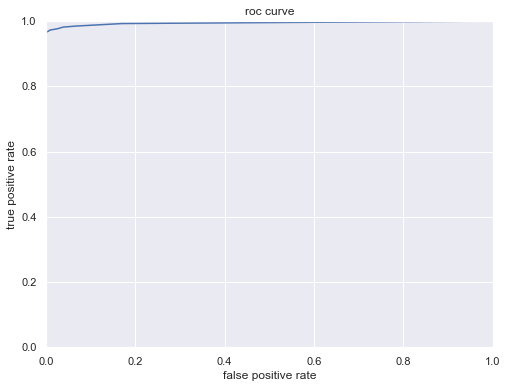

In [162]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams["font.size"]=12
plt.title("roc curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [163]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.9811736431003405
1.0
0.9661748830514574


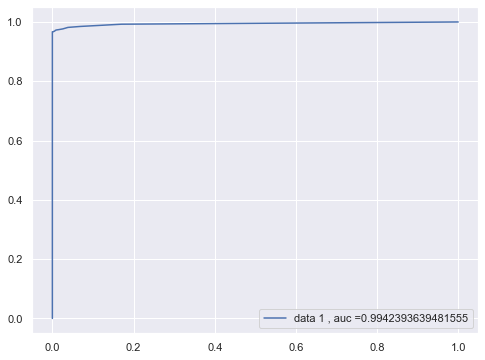

In [164]:
y_pred_proba=classi.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1 , auc ="+str(auc))
plt.legend(loc=4)
plt.show()

In [165]:
fpr , tpr , thresholds = roc_curve(y_train,y_train_prob)

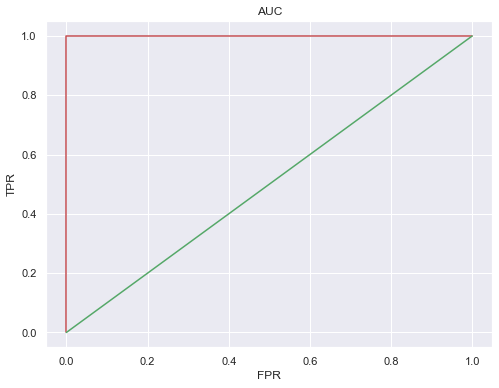

In [166]:
plt.plot(fpr,tpr,color="r")
plt.plot(fpr,fpr,color="g")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.show()

In [167]:
thresholds[0]=thresholds[0]-1

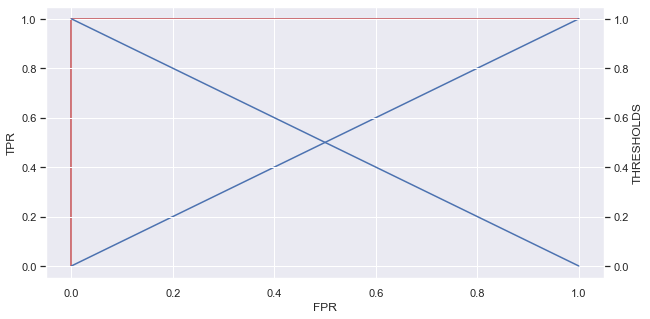

In [168]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,color="r")
ax.plot(fpr,fpr)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax1=ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel("THRESHOLDS")
plt.show()

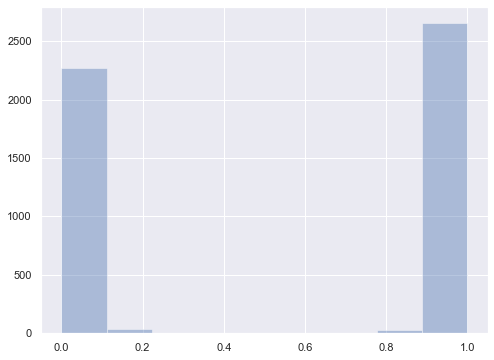

In [169]:
y_pred_class=y_prob[:,1]
sns.distplot(y_pred_class,kde=False)
plt.show()

In [170]:
for i in range(y_pred_class.size):
    print(y_pred_class[i],y_pred[i])

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.06 0.0
1.0 1.0
1.0 1.0
0.06 0.0
0.04 0.0
1.0 1.0
0.02 0.0
0.0 0.0
1.0 1.0
0.96 1.0
0.0 0.0
0.96 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.98 1.0
0.02 0.0
0.0 0.0
1.0 1.0
0.02 0.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.96 1.0
0.0 0.0
1.0 1.0
0.02 0.0
0.0 0.0
0.96 1.0
1.0 1.0
1.0 1.0
0.96 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.94 1.0
1.0 1.0
0.88 1.0
0.06 0.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.98 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.02 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.98 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.96 1.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.94 1.0
1.0 1.0
0.0 0.0
1.0 1.0
0.92 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.98 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0

In [171]:
y_pred_adj=y_pred
for i in range (y_pred_class.size):
    if y_pred_class[i]>0.3:
        y_pred_adj[i]=1
    else:
        y_pred_adj[i]=0

In [172]:
confusion_matrix(y_test,y_pred_adj)

array([[2214,    0],
       [  93, 2686]])

In [173]:
classi=RandomForestClassifier(max_depth=3,random_state=42)
classi.fit(X_train,y_train)
y_train_pred=classi.predict(X_train)
y_train_prob=classi.predict_proba(X_train)[:,1]
print("accuracy on train : ",accuracy_score(y_train,y_train_pred))
print("auc on train : ",roc_auc_score(y_train,y_train_prob))
print("confusion matrix : ","\n", confusion_matrix(y_train,y_train_pred))
y_test_pred=classi.predict(X_test)
y_test_prob=classi.predict_proba(X_test)[:,1]
print("accuracy on test : ",accuracy_score(y_test,y_test_pred))
print("auc on test : ",roc_auc_score(y_test,y_test_prob))
print("confusion matrix : ","\n", confusion_matrix(y_test,y_test_pred))

accuracy on train :  1.0
auc on train :  1.0
confusion matrix :  
 [[5279    0]
 [   0 6371]]
accuracy on test :  0.9811736431003405
auc on test :  0.9947563722368662
confusion matrix :  
 [[2214    0]
 [  94 2685]]


In [174]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp
z=RandomForestClassifier(random_state=42)
params={"n_estimators":sp(50,200),"max_features":sp(1,10),"max_depth":sp(2,10),"min_samples_split":sp(2,20),
       "min_samples_leaf":sp(1,20)}
rsearch=RandomizedSearchCV(z,param_distributions=params,n_iter=5,cv=3,scoring="roc_auc",random_state=42,
                          return_train_score=True,n_jobs=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839b3f0310>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839b3f09d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839b3f0f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839be80fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839b3f0b20>},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [175]:
z=RandomForestClassifier(random_state=42)
params={"n_estimators":sp(50,200),"max_features":sp(1,10),"max_depth":sp(2,10),"min_samples_split":sp(2,20),
       "min_samples_leaf":sp(1,20)}
rsearch=RandomizedSearchCV(z,param_distributions=params,n_iter=10,cv=3,scoring="roc_auc",random_state=42,
                          return_train_score=True,n_jobs=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839d63adc0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839d63a280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839bedcca0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839becd850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f839becd070>},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [176]:
rsearch.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 12,
 'n_estimators': 121}

In [177]:
rs=pd.DataFrame(rsearch.cv_results_)

In [178]:
rs.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.442421      0.022022         0.038334        0.002500   
1       0.514672      0.007065         0.038077        0.001412   
2       0.657688      0.016793         0.050880        0.002381   
3       0.476691      0.026048         0.052222        0.003117   
4       0.429142      0.013031         0.034635        0.000513   

  param_max_depth param_max_features param_min_samples_leaf  \
0               8                  4                     15   
1               6                  5                      7   
2               6                  4                      8   
3               6                  2                     12   
4               9                  5                      1   

  param_min_samples_split param_n_estimators  \
0                      12                121   
1                      12                137   
2                       4                199   
3                       7                179   
4                      13                107   

                                              params  ...  split1_test_score  \
0  {'max_depth': 8, 'max_features': 4, 'min_sampl...  ...           1.000000   
1  {'max_depth': 6, 'max_features': 5, 'min_sampl...  ...           1.000000   
2  {'max_depth': 6, 'max_features': 4, 'min_sampl...  ...           1.000000   
3  {'max_depth': 6, 'max_features': 2, 'min_sampl...  ...           0.999804   
4  {'max_depth': 9, 'max_features': 5, 'min_sampl...  ...           1.000000   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           1.000000         1.000000         0.00000                1   
1           1.000000         1.000000         0.00000                1   
2           1.000000         1.000000         0.00000                1   
3           0.999912         0.999874         0.00005               10   
4           1.000000         1.000000         0.00000                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.999942            0.999934            0.999933   
4            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          1.000000         0.000000  
1          1.000000         0.000000  
2          1.000000         0.000000  
3          0.999936         0.000004  
4          1.000000         0.000000  

[5 rows x 21 columns]

<AxesSubplot:xlabel='param_max_depth'>

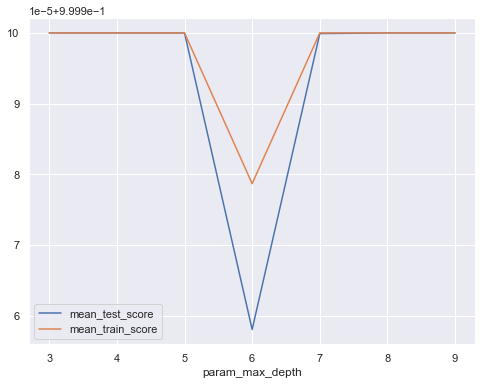

In [179]:
rs.groupby("param_max_depth")["mean_test_score","mean_train_score"].agg("mean").plot()

In [180]:
classi=RandomForestClassifier(**rsearch.best_params_)
classi.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=15,
                       min_samples_split=12, n_estimators=121)

In [181]:
y_train_pred=classi.predict(X_train)
y_train_prob=classi.predict_proba(X_train)[:,1]
print("accuracy on train : ",accuracy_score(y_train,y_train_pred))
print("auc on train : ",roc_auc_score(y_train,y_train_prob))
print("confusion matrix : ","\n", confusion_matrix(y_train,y_train_pred))
y_test_pred=classi.predict(X_test)
y_test_prob=classi.predict_proba(X_test)[:,1]
print("accuracy on test : ",accuracy_score(y_test,y_test_pred))
print("auc on test : ",roc_auc_score(y_test,y_test_prob))
print("confusion matrix : ","\n", confusion_matrix(y_test,y_test_pred))

accuracy on train :  1.0
auc on train :  1.0
confusion matrix :  
 [[5279    0]
 [   0 6371]]
accuracy on test :  0.9811736431003405
auc on test :  0.9972751826594674
confusion matrix :  
 [[2214    0]
 [  94 2685]]


BOOSTING

In [182]:
from sklearn.ensemble import AdaBoostClassifier
classi=AdaBoostClassifier()
classi.fit(X_train,y_train)
y_train_pred=classi.predict(X_train)
y_train_prob=classi.predict_proba(X_train)[:,1]
print("accuracy on train : ",accuracy_score(y_train,y_train_pred))
print("auc on train : ",roc_auc_score(y_train,y_train_prob))
print("confusion matrix : ","\n", confusion_matrix(y_train,y_train_pred))
y_test_pred=classi.predict(X_test)
y_test_prob=classi.predict_proba(X_test)[:,1]
print("accuracy on test : ",accuracy_score(y_test,y_test_pred))
print("auc on test : ",roc_auc_score(y_test,y_test_prob))
print("confusion matrix : ","\n", confusion_matrix(y_test,y_test_pred))

accuracy on train :  1.0
auc on train :  1.0
confusion matrix :  
 [[5279    0]
 [   0 6371]]
accuracy on test :  0.9811736431003405
auc on test :  0.9830874415257287
confusion matrix :  
 [[2214    0]
 [  94 2685]]


MODELS COMPARISON

In [183]:
df.columns.get_loc("Release_Clause_Class")

28

In [184]:
array=df.values
X=array[:,[11,12,13,14,15,16,17,18,19,20]]
y=array[:,28]
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [185]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.679536 (0.159494)
RF: 0.775191 (0.160385)
KNN: 0.745928 (0.156370)
DT: 0.697926 (0.126725)


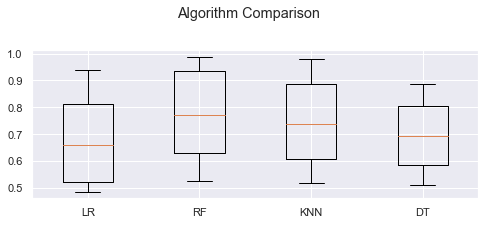

In [186]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(211)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()